# <div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>



<div style = "text-align: right"> Final Project </div>

 <div style="text-align: right">Submitted By:
Priyam Suthar (001054934) 
    Karn Vadaliya(001305057)
     Rahil Kapadia(001300490)</div>

## Book: Lord of the Rings - The Fellowship of The Ring 
## Author: J.R.R. Tolkien

<center>
    <img src="34.jpg" width=500 />
</center>

Dont know anything about Lord of the rings? I am sure google will help us find the correct material but lets try to summarize from our file.

In [72]:
def _create_frequency_table(text_string) -> dict:

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [75]:
with open('data/bookx.txt', 'r') as file:
    data = file.read().replace('\n', '')

In [76]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# 1 Create the word frequency table
freq_table = _create_frequency_table(data)

# 2 Tokenize the sentences
sentences = sent_tokenize(data)

# 3 Important Algorithm: score the sentences
sentence_scores = _score_sentences(sentences, freq_table)

# 4 Find the threshold
threshold = _find_average_score(sentence_scores)

# 5 Important Algorithm: Generate the summary
summary = _generate_summary(sentences, sentence_scores, 2 * threshold)

print(summary)

 J.R.R. 90–91). We will also explain archaic or unusual words and names in The Lord of the Rings, explore literary and historical influences, note connections with Tolkien’s other writings, and comment on differences between its drafts and published form, on questions of language, and on much else that we hope will interest readers and enhance their enjoyment of Tolkien’s masterpiece.Wayne G. Hammond & Christina Scull May 2004 FOREWORD TO THE SECOND EDITIONThis tale grew in the telling, until it became a history of the Great War of the Ring and included many glimpses of the yet more ancient history that preceded it. It does not. . There, he thought, lay his ring. he cried. 1401). 172). . Bilbo was going to be eleventy-one, 111, a rather curious number, and a very respectable age for a hobbit (the Old Took himself had only reached 130); and Frodo was going to be thirty-three, 33, an important number: the date of his ‘coming of age’.Tongues began to wag in Hobbiton and Bywater; and rumou

Importing the basic libraries

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
#nltk.download()

Reading the book as text file.

In [0]:
with open("bookx.txt", "r") as f:
    text = f.read()
   

In [0]:
text = text.lower() #Lowercasing each word

In [0]:
len(text)

1025898

In [0]:
import re

Obtainig individual words from th text file

In [0]:
def get_words_from_string(s):
    return list(re.findall(re.compile('\w+'), s.lower()))
totalWords =[]
totalWords = get_words_from_string(text)
totalWords

['j',
 'r',
 'r',
 'tolkien',
 's',
 'the',
 'lord',
 'of',
 'the',
 'rings',
 'is',
 'often',
 'erroneously',
 'called',
 'a',
 'trilogy',
 'when',
 'it',
 'is',
 'in',
 'fact',
 'a',
 'single',
 'novel',
 'consisting',
 'of',
 'six',
 'books',
 'plus',
 'appendices',
 'sometimes',
 'published',
 'in',
 'three',
 'volumes',
 'the',
 'first',
 'volume',
 'the',
 'fellowship',
 'of',
 'the',
 'ring',
 'was',
 'published',
 'in',
 'great',
 'britain',
 'by',
 'the',
 'london',
 'firm',
 'george',
 'allen',
 'unwin',
 'on',
 '29',
 'july',
 '1954',
 'an',
 'american',
 'edition',
 'followed',
 'on',
 '21',
 'october',
 'of',
 'the',
 'same',
 'year',
 'published',
 'by',
 'houghton',
 'mifflin',
 'company',
 'of',
 'boston',
 'in',
 'the',
 'production',
 'of',
 'this',
 'first',
 'volume',
 'tolkien',
 'experienced',
 'what',
 'became',
 'for',
 'him',
 'a',
 'continual',
 'problem',
 'printer',
 's',
 'errors',
 'and',
 'compositor',
 's',
 'mistakes',
 'including',
 'wellintentioned',


In [0]:
fdist = nltk.FreqDist(totalWords)
print(fdist)

<FreqDist with 9402 samples and 195030 outcomes>


Frequency of the most common 100 words.

In [0]:
fdist.most_common(100)

[('the', 12139),
 ('and', 7699),
 ('of', 5360),
 ('to', 4062),
 ('a', 3813),
 ('in', 3188),
 ('he', 3061),
 ('i', 2856),
 ('it', 2806),
 ('that', 2564),
 ('was', 2478),
 ('they', 1998),
 ('you', 1857),
 ('but', 1792),
 ('his', 1605),
 ('said', 1476),
 ('for', 1468),
 ('not', 1464),
 ('as', 1434),
 ('is', 1369),
 ('on', 1315),
 ('had', 1274),
 ('at', 1208),
 ('with', 1147),
 ('frodo', 1096),
 ('there', 1078),
 ('were', 1066),
 ('have', 1048),
 ('we', 997),
 ('be', 914),
 ('all', 891),
 ('him', 853),
 ('them', 798),
 ('from', 788),
 ('if', 777),
 ('or', 742),
 ('s', 729),
 ('their', 708),
 ('now', 686),
 ('are', 675),
 ('no', 656),
 ('out', 639),
 ('by', 607),
 ('up', 603),
 ('this', 584),
 ('will', 567),
 ('then', 565),
 ('what', 543),
 ('do', 514),
 ('my', 501),
 ('been', 477),
 ('into', 473),
 ('t', 472),
 ('gandalf', 467),
 ('so', 464),
 ('long', 464),
 ('me', 463),
 ('could', 458),
 ('would', 448),
 ('came', 442),
 ('one', 439),
 ('down', 428),
 ('when', 425),
 ('more', 425),
 ('aga

Removing the stop words

In [0]:
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [0]:
stop_words.add('the')
stop_words.add('now')
stop_words.add('many')
stop_words.add('still')
stop_words.add('came')
stop_words.add('will')
stop_words.add('said')
stop_words.add('j')
stop_words.add('21')

In [0]:
#file1 = open("text.txt") 
#file1 = open("bookx.txt") 
#line = file1.read()# Use this to read file content as a stream: 
#words = line.split() 
newwords = []
for r in totalWords:
    if not r.lower() in stop_words: 
        newwords.append(r)
        #appendFile = open('filteredtext.txt','a') 
        #appendFile.write(" "+r) 
        #appendFile.close()

New words after removing the stop words

In [0]:
print(newwords)

['r', 'r', 'tolkien', 'lord', 'rings', 'often', 'erroneously', 'called', 'trilogy', 'fact', 'single', 'novel', 'consisting', 'six', 'books', 'plus', 'appendices', 'sometimes', 'published', 'three', 'volumes', 'first', 'volume', 'fellowship', 'ring', 'published', 'great', 'britain', 'london', 'firm', 'george', 'allen', 'unwin', '29', 'july', '1954', 'american', 'edition', 'followed', 'october', 'year', 'published', 'houghton', 'mifflin', 'company', 'boston', 'production', 'first', 'volume', 'tolkien', 'experienced', 'became', 'continual', 'problem', 'printer', 'errors', 'compositor', 'mistakes', 'including', 'wellintentioned', 'corrections', 'sometimes', 'idiosyncratic', 'usage', 'corrections', 'include', 'altering', 'dwarves', 'dwarfs', 'elvish', 'elfish', 'farther', 'nasturtians', 'nasturtiums', 'try', 'say', 'try', 'say', 'worst', 'tolkien', 'elven', 'elfin', 'work', 'lord', 'rings', 'containing', 'invented', 'languages', 'delicately', 'constructed', 'nomenclatures', 'errors', 'incon

In [0]:
fdist = nltk.FreqDist(newwords)
print(fdist)

<FreqDist with 9245 samples and 90082 outcomes>


In [0]:
fdist.most_common(100)

[('frodo', 1096),
 ('gandalf', 467),
 ('long', 464),
 ('could', 458),
 ('would', 448),
 ('one', 439),
 ('like', 411),
 ('sam', 406),
 ('go', 388),
 ('come', 380),
 ('great', 367),
 ('ring', 354),
 ('back', 344),
 ('away', 340),
 ('us', 337),
 ('far', 333),
 ('bilbo', 325),
 ('dark', 317),
 ('see', 311),
 ('old', 305),
 ('seemed', 298),
 ('hobbits', 298),
 ('well', 297),
 ('time', 290),
 ('know', 287),
 ('even', 285),
 ('last', 284),
 ('may', 276),
 ('way', 274),
 ('light', 269),
 ('road', 268),
 ('went', 267),
 ('upon', 266),
 ('yet', 260),
 ('must', 252),
 ('shall', 252),
 ('looked', 248),
 ('night', 236),
 ('merry', 231),
 ('much', 228),
 ('little', 226),
 ('shire', 226),
 ('heard', 225),
 ('end', 224),
 ('good', 223),
 ('thought', 214),
 ('made', 211),
 ('pippin', 211),
 ('say', 209),
 ('aragorn', 208),
 ('trees', 207),
 ('though', 207),
 ('strider', 205),
 ('think', 203),
 ('behind', 201),
 ('saw', 200),
 ('found', 199),
 ('left', 198),
 ('eyes', 198),
 ('water', 197),
 ('first', 1

Plotting the most frequent words

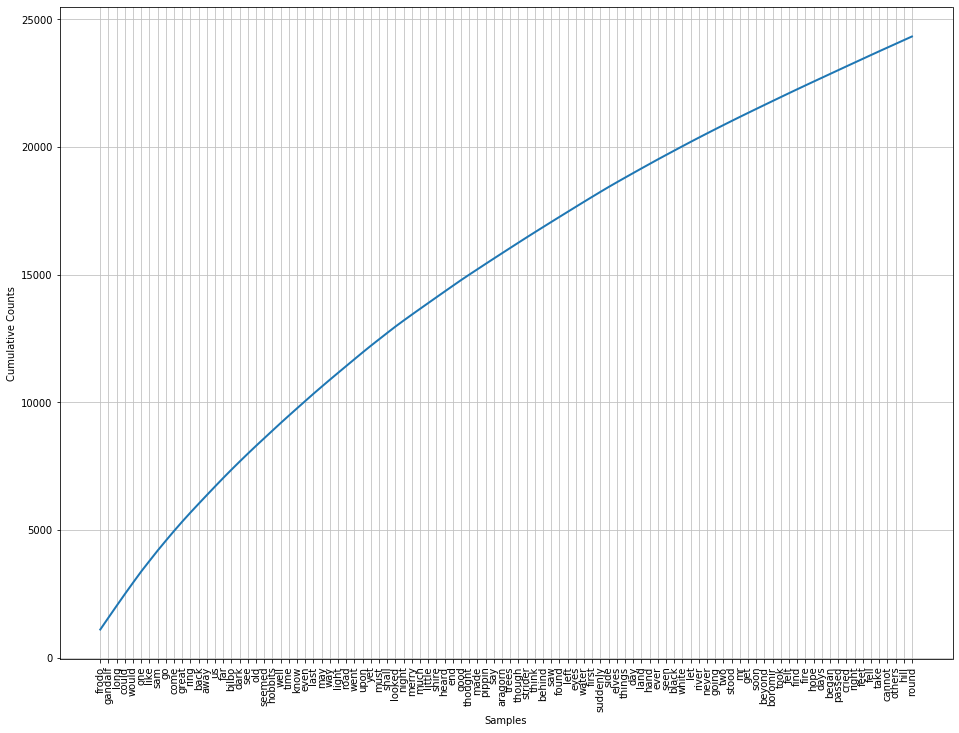

In [0]:
fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot(100, cumulative=True)

In [0]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer converts a collection of text into a matrix of features. Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer

We fit a vectorizer to learn the vocabulary. We transform a set of text into that feature space.

In [0]:
filenames = ['data/Lordoftherings1.txt']      
                                                             
vectorizer = CountVectorizer(input='filename',ngram_range=(1, 1),stop_words='english',binary='True')               
X = vectorizer.fit_transform(filenames)  # a sparse matrix 

In [0]:
X.shape

(1, 8440)

TF-IDF uses the product of two intermediate values, the Term Frequency and Inverse Document Frequency

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
X_weighted = tfidf.fit_transform(X)

In [0]:
from gensim import corpora, models, similarities, matutils

# create the corpus using a conversion utility
gensim_corpus = matutils.Sparse2Corpus(X_weighted)

# build the LDA model
lda = models.LdaModel(gensim_corpus, num_topics=100)
lda

**Stemming** is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed". 

**Lemmatization** is a more refined process that uses specific language and grammar rules to derive the root of a word. For eg: amaz becomes amaze or amazing

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize  
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  
#  Reads ‘alice.txt’ file 
sample = open("data/Lordoftherings1.txt", "r") 
s = sample.read() 
#s= s.replace("\n", " ")

data = [] 
data2=[]
ps=PorterStemmer()
wl=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
allwords=[]
# iterate through each sentence in the file 
for i in sent_tokenize(s): 
    temp = []
    # tokenize the sentence into words 
    for j in word_tokenize(i):
        #j=ps.stem(j)
        j=wl.lemmatize(j)
        if j not in stop_words: 
            allwords.append(j.lower())
            temp.append(j.lower())
        #else:
            #print(j)
    data.append(temp) 
    data2.append(temp)
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5)

In [2]:
model1.similarity('frodo','gandalf')

0.9833268

In [3]:
len(allwords)

130439

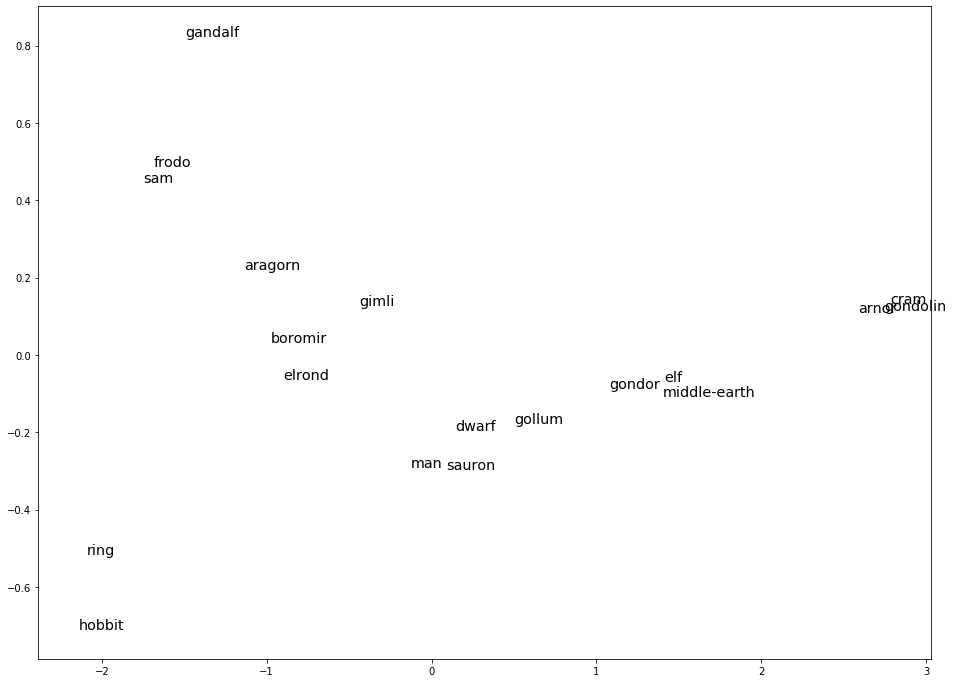

In [30]:
from sklearn.decomposition import PCA

# we use 'Soviet' instead of 'Russia' because reuters is an old dataset
#words = allwords
words = ['frodo', 'gandalf', 'ring', 'hobbit', 'elrond', 'gondolin'
          ,'arnor','middle-earth','gondor','gollum','aragorn','sam','gimli','sauron',
          'boromir','cram','dwarf','elf','man']
#words2 = allwords[10:20]
#words = words1 + words2
word_vectors = [model1[word] for word in words]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]


# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

As we can see frodo and sam were friends so they are together. Dwarf and elf are together which makes sense.

Defining the sentiment finder function 

In [31]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

The sentiment for the complete text

In [32]:
sen=detect_sentiment(s)
sen

0.06222177334233641

Removing words that are smaller than length 3 since they are of less significance value

In [33]:
for i in range(len(data)):
    #print(i)
    for j in data[i]:
        #print(j)
        if(len(j)<4):
            data[i].remove(j)

Now we also take frequent bigrams into account.

In [34]:
import re
from gensim.models import Phrases

bigram = Phrases(data, min_count=10)

for idx in range(len(data)):
    for token in bigram[data[idx]]:
        if '_' in token:  # bigrams can be recognized by the "_" that joins the invidual words
            data[idx].append(token)

First, we create a dictionary representation for the text. This dictionary will map each word to a unique ID and help us create bag-of-word representations for the text. These bag-of-word representations contain the ids of the words in the text, together with their frequency. 

In [35]:
from gensim.corpora import Dictionary

dictionary = Dictionary(data)
print('Number of unique words in original documents:', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Number of unique words after removing rare and common words:', len(dictionary))

del_ids = [k for k,v in dictionary.items() if v=='.' or v==',' or v=='said' or v=='j' or v=='r' or v == "''" or v=='?' or v==' \"' or v=="\'s" or v=='i' or v=="n't"]
dictionary.filter_tokens(bad_ids=del_ids)

print("Example representation of document 1:", dictionary.doc2bow(data[0]))

Number of unique words in original documents: 8311
Number of unique words after removing rare and common words: 3563
Example representation of document 1: [(0, 1), (1, 1)]


Creating a bag of representation in the corpus

In [36]:
corpus = [dictionary.doc2bow(words) for words in data]

Now, training the model using LDA model

In [37]:
from gensim.models import LdaModel

%time model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, chunksize=1000, passes=5, random_state=1)

CPU times: user 7.87 s, sys: 11.5 ms, total: 7.88 s
Wall time: 7.87 s


Finding the top 10 topics in the text

In [38]:
for (topic, words) in model.print_topics():
    print(topic+1, ":", words)

1 : 0.066*"'" + 0.049*"shall" + 0.034*"sam" + 0.028*"cried" + 0.019*"well" + 0.018*"'but" + 0.017*"long" + 0.016*"lady" + 0.014*"stream" + 0.013*"clear"
2 : 0.030*"pippin" + 0.029*"coming" + 0.026*"that" + 0.025*"fear" + 0.023*"help" + 0.022*"wind" + 0.021*"east" + 0.021*"seemed" + 0.021*"merry" + 0.020*"spoke"
3 : 0.036*"hand" + 0.020*"path" + 0.017*"road" + 0.016*"foot" + 0.016*"we" + 0.013*"wood" + 0.013*"could" + 0.013*"back" + 0.012*"come" + 0.012*"and"
4 : 0.030*"came" + 0.026*"water" + 0.024*"they" + 0.023*"back" + 0.019*"light" + 0.018*"dark" + 0.018*"went" + 0.016*"tree" + 0.016*"shadow" + 0.015*"then"
5 : 0.059*"must" + 0.040*"frodo" + 0.035*"!" + 0.035*"behind" + 0.027*"look" + 0.020*"leave" + 0.018*"gone" + 0.018*"mr." + 0.016*"mr._frodo" + 0.015*"something"
6 : 0.079*"frodo" + 0.025*"high" + 0.020*"wa" + 0.018*"think" + 0.018*"nothing" + 0.017*"grew" + 0.016*"asked" + 0.014*"see" + 0.014*"good" + 0.014*"forward"
7 : 0.243*"'" + 0.066*"'_said" + 0.040*"boat" + 0.033*"frodo"

Visualizing the importance of topics

In [39]:
import pyLDAvis.gensim
import warnings

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.231580 -0.099048       1        1   8.041308
1      0.112351  0.024172       2        1   7.690858
2      0.154809 -0.088022       3        1  10.159132
3      0.167662  0.159968       4        1  13.910049
4     -0.028742  0.177618       5        1   6.734130
5     -0.052563  0.249346       6        1   8.503313
6     -0.316405 -0.005410       7        1  12.732014
7      0.114826 -0.145243       8        1  10.927335
8      0.083538 -0.077031       9        1  11.960937
9     -0.003896 -0.196350      10        1   9.340925, topic_info=     Category         Freq     Term        Total  loglift  logprob
68    Default  2897.000000        '  2897.000000  30.0000  30.0000
69    Default   673.000000   '_said   673.000000  29.0000  29.0000
101   Default  1262.000000    frodo  1262.000000  28.0000  28.0000
1770  Default   428.000000  aragorn   428.000000  27.0000  27.0000
1005  Default   318.000000     must   318.000000  26.0000  26.0000
226   Default   412.000000     boat   412.000000  25.0000  25.0000
514   Default   315.000000    shall   315.000000  24.0000  24.0000
775   Default   293.000000     hand   293.000000  23.0000  23.0000
15    Default   401.000000    would   401.000000  22.0000  22.0000
195   Default   338.000000     upon   338.000000  21.0000  21.0000
275   Default   290.000000    water   290.000000  20.0000  20.0000
228   Default   382.000000     came   382.000000  19.0000  19.0000
229   Default   456.000000    could   456.000000  18.0000  18.0000
384   Default   216.000000      sam   216.000000  17.0000  17.0000
1014  Default   245.000000   behind   245.000000  16.0000  16.0000
1006  Default   189.000000        !   189.000000  15.0000  15.0000
88    Default   298.000000     many   298.000000  14.0000  14.0000
180   Default   303.000000     they   303.000000  13.0000  13.0000
1301  Default   184.000000   pippin   184.000000  12.0000  12.0000
28    Default   399.000000     back   399.000000  11.0000  11.0000
807   Default   183.000000    cried   183.000000  10.0000  10.0000
551   Default   194.000000     find   194.000000   9.0000   9.0000
117   Default   177.000000   coming   177.000000   8.0000   8.0000
3266  Default   192.000000    gimli   192.000000   7.0000   7.0000
367   Default   312.000000  gandalf   312.000000   6.0000   6.0000
220   Default   162.000000     that   162.000000   5.0000   5.0000
733   Default   167.000000     high   167.000000   4.0000   4.0000
64    Default   200.000000  thought   200.000000   3.0000   3.0000
63    Default   189.000000    thing   189.000000   2.0000   2.0000
288   Default   181.000000  without   181.000000   1.0000   1.0000
...       ...          ...      ...          ...      ...      ...
1705  Topic10    43.216324    aside    44.167843   2.3490  -5.1508
658   Topic10    42.189564  shining    43.141056   2.3485  -5.1749
575   Topic10    39.881054   branch    40.832550   2.3472  -5.2311
1191  Topic10    39.473526     gift    40.427444   2.3469  -5.2414
1691  Topic10    38.521469    faded    39.472984   2.3464  -5.2658
1901  Topic10    36.829300     lead    37.780800   2.3453  -5.3108
660   Topic10    36.668362  touched    37.619793   2.3451  -5.3151
1706  Topic10    35.675900     cast    36.627407   2.3444  -5.3426
1453  Topic10    35.446766   danger    36.398190   2.3443  -5.3490
1086  Topic10    34.830864    moved    35.782429   2.3438  -5.3665
1110  Topic10    40.344971  perhaps    41.690353   2.3380  -5.2196
64    Topic10   175.810242  thought   200.501770   2.2393  -3.7476
1568  Topic10    37.435646    earth    38.591202   2.3404  -5.2944
358   Topic10   135.637878   others   159.673584   2.2076  -4.0071
499   Topic10   104.811035     need   131.859802   2.1412  -4.2649
897   Topic10   164.490219     ring   249.405640   1.9545  -3.8142
241   Topic10   102.129776    never   136.906174   2.0777  -4.2908
15    Topic10   217.888718

Defining a function to split the text data

In [40]:
def split_text(filename, n_words):
    sample = open(filename, 'r')
    s= sample.read() 
    s= s.replace("\n", "")
    chunks = []
    current_chunk_words = ""
    current_chunk_word_count = 0
    for word in word_tokenize(s.lower()):
        current_chunk_words+=word
        current_chunk_words+=" "
        current_chunk_word_count += 1
        if current_chunk_word_count == n_words:
            chunks.append(current_chunk_words)
            current_chunk_words = ""
            current_chunk_word_count = 0
    chunks.append(current_chunk_words)
    return chunks

Chunking the data into chunks of size 1000

In [41]:
texts = split_text('data/Lordoftherings1.txt', 1000)
texts

["chapter 1. a long-expected partywhen mr. bilbo baggins of bag end announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence , there was much talk and excitement in hobbiton.bilbo was very rich and very peculiar , and had been the wonder of the shire for sixty years , ever since his remarkable disappearance and unexpected return . the riches he had brought back from his travels had now become a local legend , and it was popularly believed , whatever the old folk might say , that the hill at bag end was full of tunnels stuffed with treasure . and if that was not enough for fame , there was also his prolonged vigour to marvel at . time wore on , but it seemed to have little effect on mr. baggins . at ninety he was much the same as at fifty . at ninety-nine they began to call him well-preserved , but unchanged would have been nearer the mark . there were some that shook their heads and thought this was too much of a good thing ; it se

Finding the sentiment value for each chunk

In [42]:
li=[]
for i in range(len(texts)):
    li.append(TextBlob(texts[i]).sentiment.polarity)
li[1:5]

[0.060724431818181816,
 0.12580321285140558,
 0.13042311764714365,
 0.21765441294027943]

In [44]:
len(li)

207

Plotting the progression of sentiment in the book

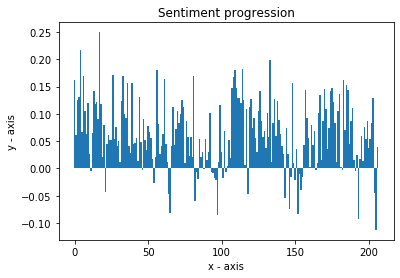

In [46]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
num = range(0,207) 
  
# heights of bars 
val = li
  
# labels for bars 
#tick_label = ['one', 'two', 'three', 'four', 'five'] 
  
# plotting a bar chart 
plt.bar(num, val, width = 1) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Sentiment progression') 
  
# function to show the plot 
plt.show() 

In [52]:
lotr = open('data/Lordoftherings1.txt', "r")
text = lotr.read()
text= text.replace("\n", "")

In [53]:
from textblob import TextBlob, Word
data = TextBlob(text)
len(data.words)

177314

### Named-Entity Recognition using Spacy

In [57]:
import spacy 
  
nlp = spacy.load('en_core_web_sm') 
  
doc = nlp(text) 
  
for ent in doc.ents: 
    print(ent.text,"-", ent.label_) 

Chapter 1 - LAW
PartyWhen - PRODUCT
Bilbo Baggins - PERSON
first - ORDINAL
Hobbiton - GPE
Bilbo - PERSON
sixty years - DATE
Baggins - PERSON
fifty - CARDINAL
ninety-nine - CARDINAL
Baggins - PERSON
the Sackville-Bagginses - ORG
Bilbo - PERSON
Frodo Baggins - PERSON
Bilbo - PERSON
ninety-nine - CARDINAL
Frodo - ORG
Bag End - FAC
Bilbo - PERSON
Frodo - PERSON
September 22nd - DATE
Frodo - ORG
Bilbo - PERSON
one day - DATE
Frodo - ORG
thirty-three - CARDINAL
Twelve - CARDINAL
Each year - DATE
Bagginses - PERSON
autumn - DATE
Bilbo - PERSON
111 - CARDINAL
130 - CARDINAL
Frodo - ORG
thirty-three - CARDINAL
33 - DATE
Hobbiton - GPE
Bywater - GPE
Shire - LOC
Bilbo Baggins - PERSON
Gamgee - GPE
Bush - PERSON
Bag End - PERSON
forty years - DATE
Holman - PERSON
Sam Gamgee - PERSON
Bilbo - PERSON
Frodo - ORG
Hillitself - ORG
Number 3 - DATE
Bag End - PERSON
Bilbo - PERSON
Gaffer - PERSON
Bilbo - PERSON
Gaffer - PERSON
Frodo - ORG
Baggins - PERSON
more than half - CARDINAL
Baggins of Hobbiton - OR

Gandalf - PERSON
Council - ORG
Rings - ORG
Council - ORG
Bilbo - PERSON
that night - TIME
Saruman - PERSON
the years - DATE
Frodo - ORG
Gandalf - PERSON
one - CARDINAL
Bilbo - PERSON
many years - DATE
years - DATE
Bilbo - PERSON
Bilbo - PERSON
the Dark Power - ORG
Shire - LOC
Hornblowers - NORP
Boffins - GPE
Bracegirdles - GPE
Frodo - PERSON
Gandalf - PERSON
Frodo - ORG
Bilbo - PERSON
Gandalf - PERSON
Frodo - ORG
Gandalf - PERSON
Gandalf - PERSON
Frodo - ORG
Frodo - ORG
Gandalf - PERSON
Frodo - ORG
Gandalf - PERSON
Sam - PERSON
Gandalf - PERSON
Frodo - PERSON
Gandalf - PERSON
Frodo - ORG
Frodo - ORG
Gandalf - PERSON
Elvish - NORP
Mordor - GPE
One - CARDINAL
One - CARDINAL
One - CARDINAL
only two - CARDINAL
Three - CARDINAL
Seven - CARDINAL
Dwarf - ORG
Nine - CARDINAL
Mortal Men - ORG
One - CARDINAL
One - CARDINAL
One - CARDINAL
One - CARDINAL
One - CARDINAL
East - LOC
Gandalf - PERSON
the Black Years - EVENT
Spring - PERSON
Winter - GPE
last  night - TIME
Sauron the Great - PERSON
Dark

Merry - PERSON
a hundred yards - QUANTITY
two - CARDINAL
Merry - PERSON
Merry - PERSON
Brandywine - PERSON
the Buck Hill - FAC
ofBrandy Hall - FAC
Brandybucks - LOC
Gorhendad Oldbuck - GPE
Oldbuck - PERSON
Marish - LOC
Shire - LOC
Brandy Hall - PERSON
Brandybuck - PERSON
Brandy Hall - ORG
three - CARDINAL
about a hundred - CARDINAL
Brandybucks - LOC
Buckland - GPE
the Old Forest - ORG
Shire - LOC
Bucklebury - GPE
Brandy Hall - ORG
Marish - NORP
Bucklanders - PERSON
the Master of the Hall - WORK_OF_ART
Brandybuck - PERSON
Rushey - PERSON
Shire - PERSON
Bucklanders - PRODUCT
half - CARDINAL
one - CARDINAL
East - LOC
Brandywine Bridge - FAC
Haysend - PERSON
Forest - ORG
twenty miles - QUANTITY
Shire - LOC
Sam - PERSON
Frodo - PERSON
Bag End - ORG
four - CARDINAL
Merry - PERSON
Pippin - PERSON
Sam - PERSON
Shire - PERSON
Frodo - PERSON
Shire - LOC
Merry - PERSON
Frodo - ORG
Frodo - ORG
twenty miles - QUANTITY
Brandywine Bridge - or - FAC
Merry - PERSON
Pippin - PERSON
Fatty Bolger - PERSON

Tom Bombadil?''He - PERSON
Goldberry - PERSON
Frodo - ORG
the Master of wood, water, and hill - WORK_OF_ART
Tom Bombadil - PERSON
Tom - PERSON
Tom Bombadil - PERSON
Tom Bombadil - PERSON
Goldberry - PERSON
Goldberry - PERSON
Tom - PERSON
Tom - PERSON
Tom - PERSON
four - CARDINAL
one - CARDINAL
two - CARDINAL
Goldberry - PERSON
Tom - PERSON
Goldberry - PERSON
one - CARDINAL
Goldberry - PERSON
a good night - TIME
the morning - TIME
Tom - PERSON
one - CARDINAL
Frodo - PERSON
Withywindle - GPE
Willow-man - PERSON
Tomhad - PERSON
Tom - PERSON
first - ORDINAL
spring - DATE
River - LOC
Goldberry - PERSON
the year - DATE
Old Man Willow's - PRODUCT
River - LOC
Frodo - ORG
Willow - PERSON
Merry - PERSON
Pippin - PERSON
the morning - TIME
Frodo - ORG
Frodo - ORG
East - LOC
Frodo - ORG
Merry - PERSON
Sam - PERSON
Tom - PERSON
merry dol - PERSON
derry dol - PERSON
east - LOC
west - LOC
half - CARDINAL
poles - NORP
a pale morning - TIME
East - LOC
Forest - ORG
Tom - PERSON
Sun - PERSON
today - DATE


one night - TIME
five - CARDINAL
queen;But - CARDINAL
Sunday - DATE
Saturday - DATE
The Man in the Moon - PERSON
The Man in the Moon - WORK_OF_ART
chair;And - WORK_OF_ART
cat:'The - ORG
Moon - PERSON
bits;But - PRODUCT
Sun'll - FAC
the Man in the Moon: ' - WORK_OF_ART
three - CARDINAL
Moon - PERSON
Moon - PERSON
Saturday - DATE
Sunday - DATE
Moon - PERSON
Sun - PERSON
Frodo - ORG
Barley - PERSON
Bob - PERSON
Frodo - ORG
Frodo - ORG
second - ORDINAL
Moon - PERSON
Pippin - PERSON
Sam - PERSON
one - CARDINAL
Bree - PERSON
half - CARDINAL
two - CARDINAL
the evening - TIME
Frodo - ORG
Strider - PERSON
Ring - ORG
Strider - PERSON
Frodo - ORG
Strider - PERSON
Baggins - PERSON
Frodo - ORG
Strider - PERSON
Frodo - ORG
Butterbur - PERSON
Butterbur - PERSON
Mugwort - PERSON
Mugwort - GPE
Butterbur - PERSON
Underhill - PERSON
Took - PERSON
Mugwort - LOC
Butterbur - PERSON
Frodo - ORG
Strider - PERSON
the Men of Bree - ORG
that evening - TIME
One - CARDINAL
two - CARDINAL
Frodo - ORG
two - CARDINAL

Midgewater - FAC
Strider - PERSON
valley - LOC
Strider - PERSON
Ferny - ORG
Road - PRODUCT
Archet - PERSON
Strider - PERSON
one - CARDINAL
The next day - DATE
the third day - DATE
Bree - PERSON
Chetwood - PRODUCT
Road - FAC
Bree - PERSON
Midge - CARDINAL
Marshes - LOC
first - ORDINAL
Pippin - PERSON
Sam - PERSON
a miserable day - DATE
thousands - CARDINAL
The next day - DATE
fourth - ORDINAL
the night - TIME
Sam - PERSON
Frodo - PERSON
some hours - TIME
Strider - PERSON
Strider - PERSON
Strider - PERSON
the fifth day - DATE
Weathertop - ORG
Strider - PERSON
The Old Road - FAC
noon - TIME
tomorrow - DATE
Frodo - ORG
Gandalf there?''Yes - PERSON
Bree - PERSON
Weathertop - ORG
Sam - PERSON
Strider - PERSON
Frodo - ORG
Strider - PERSON
Weathertop - ORG
Weathertop - ORG
early evening - TIME
Bag End far away - LOC
day - DATE
night - TIME
That night - TIME
Strider - PERSON
the early night-hours - TIME
Next morning - TIME
a night - TIME
Frodo - ORG
Frodo - ORG
Strider - PERSON
a thousand feet 

Gandalf - PERSON
Nine - CARDINAL
Elrond - ORG
Road - FAC
the Bridge of Mitheithel - ORG
seven days ago - DATE
Three - CARDINAL
Sauron - GPE
Bridge - FAC
two - CARDINAL
Two days ago - DATE
Bridge - FAC
today - DATE
Road - FAC
five - CARDINAL
four - CARDINAL
Ford - ORG
Glorfindel - PERSON
evening - TIME
Frodo - ORG
Sam - PERSON
Sam - PERSON
Frodo - ORG
Briefly Strider - PERSON
Weathertop - ORG
Elf - ORG
Aragorn - PERSON
Frodo - ORG
Frodo - ORG
The dusk of evening - TIME
Glorfindel - PERSON
Frodo - ORG
Frodo - ORG
Frodo - ORG
Glorfindel - PERSON
Elf - ORG
night - TIME
moon - PERSON
the grey of dawn - TIME
Merry - PERSON
Sam - PERSON
Strider - PERSON
a few yards - QUANTITY
Glorfindel - PERSON
the morning - TIME
Glorfindel - PERSON
Shire - LOC
less than five hours - TIME
two - CARDINAL
day - DATE
almost twenty miles - QUANTITY
valley - LOC
Bruinen - GPE
Glorfindel - PERSON
Strider - PERSON
Frodo - ORG
the day - DATE
the coming of night - DATE
early next morning - TIME
Ford - ORG
Glorfindel 

Thrur - ORG
Balin - PERSON
Dbin - PERSON
Ori - PERSON
Uin - PERSON
thirty years ago - DATE
Moria - GPE
Moria - GPE
about a year ago - DATE
messenger - PERSON
Dbin - PERSON
Moria - GPE
Mordor - GPE
Dbin - PERSON
Sauron - PERSON
one - CARDINAL
Sauron - GPE
three - CARDINAL
Dwarf - ORG
Moria - GPE
Dbin - PERSON
yea - PERSON
nay - PERSON
Dbin - PERSON
messenger - PERSON
deceit - ORG
Mordor - GPE
third - ORDINAL
the ending of the year - DATE
Dbin - PERSON
Bilbo - PERSON
Elrond - ORG
Shadow - ORG
Dale - GPE
King Brand - PERSON
Dbin - PERSON
Elrond - PERSON
today - DATE
Ring - GPE
Sauron - GPE
this day - DATE
first - ORDINAL
the Tale of the Ring - ORG
Elrond - ORG
Sauron andthe Rings of Power - ORG
the  Second Age - DATE
Moria - GPE
Sauron - GPE
the Mountain of Fire the One Ring - LOC
Three - CARDINAL
Moria - GPE
all the years - DATE
Elrond - ORG
Elrond - ORG
the morning - TIME
the Kings of Men to Middle-earth - FAC
Sea - LOC
Isildur - ORG
Anbrion - ORG
Arnor - GPE
South - LOC
Gondor - GPE
An

Gandalf - PERSON
the morning - TIME
Nine - CARDINAL
day - DATE
night - TIME
Frodo - ORG
Barrow - GPE
Rohan - GPE
Hobbiton - GPE
them day - DATE
Greenway - FAC
Shire - LOC
Hobbiton - GPE
Frodo - ORG
oldGamgee - PERSON
Bag End - ORG
Frodo - ORG
Hobbiton - GPE
less than a week before - DATE
Hill - ORG
Crickhollow - ORG
Frodo - ORG
one - CARDINAL
two - CARDINAL
Bree - PERSON
I. - NORP
Frodo - ORG
Bree - PERSON
Strider - PERSON
Strider - WORK_OF_ART
Butterbur - PERSON
I. - PERSON
seven years - DATE
Now I can take a night's rest - WORK_OF_ART
first - ORDINAL
night - TIME
two - CARDINAL
Bree - PERSON
Five - CARDINAL
Bree - PERSON
Bree - PERSON
Bree - PERSON
two - CARDINAL
four - CARDINAL
Shire - LOC
Bree - PERSON
Crickhollow - ORG
Road - FAC
Captain - PRODUCT
Road - FAC
Weathertop - ORG
my second day - DATE
Sun - PERSON
night - TIME
Amon Syl - PERSON
Weathertop - ORG
`At - PERSON
Frodo - ORG
Nine - CARDINAL
Aragorn - PERSON
Four - CARDINAL
Ford - ORG
only five - CARDINAL
nine - CARDINAL
Hoarw

dusk - TIME
half - CARDINAL
Caradhras - PERSON
Sun - ORG
One - CARDINAL
one - CARDINAL
Frodo - ORG
Hollin - PRODUCT
Moon - PERSON
hour - TIME
first - ORDINAL
moonwas - PERSON
Frodo - ORG
Gandalf - PERSON
`No - PERSON
Aragorn - PERSON
The next morning - TIME
two - CARDINAL
the third morning - TIME
Caradhras - PERSON
Aragorn - WORK_OF_ART
Tonight - TIME
the Redhorn Gate - FAC
Gandalf - PERSON
Aragorn - PERSON
Gandalf - PERSON
Aragorn - PERSON
Rohan - GPE
Saruman - GPE
serve?''Who - NORP
Gandalf - PERSON
Caradhras - PERSON
Gandalf - PERSON
Aragorn - PERSON
the late afternoon - TIME
Gandalf - PERSON
Aragorn - PERSON
Caradhras - PERSON
Frodo - ORG
Gandalf - PERSON
the Redhorn Gate - FAC
more than two - CARDINAL
Dark - GPE
early this evening - TIME
Boromir - PERSON
the White Mountains - LOC
Bill - PERSON
Sam - PERSON
Gandalf - PERSON
first - ORDINAL
midnight - TIME
Caradhras - PERSON
Frodo - ORG
Frodo - ORG
Gandalf - PERSON
Aragorn - PERSON
two - CARDINAL
Sam - PERSON
Snow - PERSON
a fine mo

Sam - PERSON
Moria - GPE
Khazad-dym - GPE
Gimli - PERSON
Gandalf - PERSON
Moria - GPE
Sam - PERSON
Gandalf - PERSON
Moria - GPE
goldand jewels - GPE
the toys of the Dwarves - ORG
Moria - GPE
Elvish - NORP
Dwarves - ORG
ten - CARDINAL
Caradhras - PERSON
Dwarves - ORG
Durin - GPE
Orcs - LOC
Dwarves - ORG
Elves - PRODUCT
Bilbo - PERSON
Thorin - GPE
Michel - GPE
Gimli - ORG
Moria - GPE
Gandalf - PERSON
Bilbo - PERSON
Bilbo - PERSON
Bilbo - PERSON
Bilbo - PERSON
those days - DATE
Moria - GPE
Ring - GPE
One - CARDINAL
one - CARDINAL
Frodo - ORG
two slow hours - TIME
two - CARDINAL
Legolas - PERSON
two - CARDINAL
a dim light - QUANTITY
Gandalf - PERSON
Moria - GPE
today - DATE
the Great Gates - FAC
the Dimrill Dale - FAC
Gimli - PERSON
Moria - GPE
Balin - PERSON
Gandalf - PERSON
another night - TIME
Moria - GPE
'`No - ORG
Boromir - PERSON
Gandalf - PERSON
the Great Gates - EVENT
half - CARDINAL
about two feet - QUANTITY
Frodo - ORG
Gandalf - PERSON
Daeron - ORG
Moria - GPE
moria - GPE
Frodo -

Aragorn - PERSON
Gimli - PERSON
Haldir - PERSON
these  days - DATE
Legolas - PERSON
one - CARDINAL
Folly - WORK_OF_ART
Haldir - PERSON
Lothlurien - PERSON
Rivendell - ORG
Shadow - ORG
Sauron - GPE
Rohan - GPE
the Great River - LOC
Sea - LOC
Lady - PERSON
Merry - PERSON
Shire - LOC
Haldir - PERSON
Merry - PERSON
Lothlurien - PERSON
Haldir - PERSON
Shadow - ORG
Sun - LOC
Elves - PRODUCT
Sea - LOC
Lothlurien - PERSON
the Great Sea - LOC
Haldir - PERSON
Elf - ORG
Frodo - ORG
Naith - PERSON
the Elder Days - EVENT
Lurien - PERSON
Elves - NORP
Lurien - PERSON
noon - TIME
Frodo - ORG
Sun - ORG
Moria - GPE
Haldir - PERSON
Silverlode - GPE
Haldir - PERSON
Gimli - ORG
Rivendell - ORG
first - ORDINAL
Gimli - ORG
first - ORDINAL
Naith - PERSON
Lurien - PERSON
Durin - GPE
Frodo - ORG
the Elder Days - DATE
two - CARDINAL
afternoon - TIME
Haldir - PERSON
happier days - DATE
winter - DATE
dusk - TIME
Frodo - ORG
first - ORDINAL
first - ORDINAL
winter - DATE
summer - DATE
spring - DATE
earth - LOC
Lurie

Gimli - ORG
Gluin - PERSON
Lady Galadriel - PERSON
Gimli - ORG
nay - PERSON
Elves - PERSON
Celeborn - ORG
Dwarf - ORG
Lady - PERSON
Dwarves - ORG
Gimli - ORG
Lady - PERSON
first - ORDINAL
Mountain - LOC
Wood - WORK_OF_ART
the end of days - DATE
one - CARDINAL
three - CARDINAL
Gimli - ORG
Gimli - PERSON
Gluin - PERSON
Ring-bearer - PERSON
Frodo - ORG
Edrendil - PERSON
night - TIME
Galadriel - PERSON
Frodo - PERSON
Celeborn - ORG
A yellow noon - TIME
Tongue - FAC
Lurien - PERSON
the Tongue the Lady Galadriel - ORG
Lurien - PERSON
Silverlode - ORG
the Great River - LOC
Frodo - ORG
Elves - NORP
Sea - LOC
Elvish - NORP
Middle-earth - LOC
lauril lantar - PERSON
Yjni - PERSON
nutiml - PERSON
aldaron!Yjni - CARDINAL
yuldar - PERSON
nl pella - PERSON
Vardo tellumarnu luini yassen - PERSON
Elentbri - ORG
caita mornili falmalinnar imbl - PERSON
ar hnsilunt - PERSON
Calaciryo mnri - PERSON
Rumello vanwa - PERSON
Valimar - PERSON
Nambril - PERSON
Valimar - PERSON
Nambril!`Ah - PERSON
The long years

Gollum - PERSON
Minas Tirith - PERSON
Burden - PERSON
`We - PERSON
Denethor - PERSON
Elrond - PERSON
Burden - PERSON
Frodo - ORG
Gandalf - PERSON
Legolas - PERSON
Frodo - ORG
Minas Tirith - PERSON
Gimli - PERSON
Bearer - NORP
Mount - NORP
Frodo - ORG
Minas Tirith - PERSON
Legolas - PERSON
Aragorn - PERSON
eight - CARDINAL
three - CARDINAL
two - CARDINAL
three - CARDINAL
Sam - PERSON
Gimli - PERSON
Boromir - PERSON
at least Meriadoc - CARDINAL
Peregrin - GPE
Legolas - GPE
Merry - PERSON
Frodo - ORG
Shire - LOC
Rivendell - ORG
Frodo - ORG
Mordor - GPE
Pippin - PERSON
east - LOC
Mordor - LOC
Sam - PERSON
Minas Tirith - PERSON
Master Boromir - WORK_OF_ART
Boromir - PERSON
first - ORDINAL
Sam - PERSON
Frodo - PERSON
the Cracks of Doom - ORG
Ring - GPE
River - LOC
Mark - PERSON
Baggins - PERSON
Sam - PERSON
Aragorn - PERSON
Pippin - PERSON
Aragorn - PERSON
Bearer - NORP
Burden - PERSON
Frodo - ORG
Pippin - PERSON
up?'`Yes - ORG
Aragorn - PERSON
The hour - TIME
The morning - TIME
Boromir - PE

In [235]:
len(doc.ents)

6128

In [58]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Counting various kind of entities

In [59]:
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'LAW': 29,
         'PRODUCT': 138,
         'PERSON': 3937,
         'ORDINAL': 165,
         'GPE': 653,
         'DATE': 447,
         'CARDINAL': 619,
         'ORG': 1634,
         'FAC': 168,
         'LOC': 516,
         'WORK_OF_ART': 88,
         'TIME': 364,
         'EVENT': 27,
         'NORP': 142,
         'QUANTITY': 50,
         'LANGUAGE': 2})

Most common entities

In [60]:
items = [x.text for x in doc.ents]
Counter(items).most_common(3)

[('Frodo', 945), ('Gandalf', 418), ('Sam', 371)]

In [61]:
sentences = [x for x in doc.sents]

Visualizing the result

In [62]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [63]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Chapter', 'NOUN', 'chapter'),
 ('1', 'NUM', '1'),
 ('Long', 'ADV', 'long'),
 ('expected', 'VERB', 'expect'),
 ('PartyWhen', 'PROPN', 'PartyWhen'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Bilbo', 'PROPN', 'Bilbo'),
 ('Baggins', 'PROPN', 'Baggins'),
 ('Bag', 'PROPN', 'Bag'),
 ('End', 'PROPN', 'End'),
 ('announced', 'VERB', 'announce'),
 ('shortly', 'ADV', 'shortly'),
 ('celebrating', 'VERB', 'celebrate'),
 ('eleventy', 'NOUN', 'eleventy'),
 ('birthday', 'NOUN', 'birthday'),
 ('party', 'NOUN', 'party'),
 ('special', 'ADJ', 'special'),
 ('magnificence', 'NOUN', 'magnificence'),
 ('talk', 'NOUN', 'talk'),
 ('excitement', 'NOUN', 'excitement'),
 ('Hobbiton', 'PROPN', 'Hobbiton'),
 ('Bilbo', 'PROPN', 'Bilbo'),
 ('rich', 'ADJ', 'rich'),
 ('peculiar', 'ADJ', 'peculiar'),
 ('wonder', 'NOUN', 'wonder'),
 ('Shire', 'PROPN', 'Shire'),
 ('years', 'NOUN', 'year'),
 ('remarkable', 'ADJ', 'remarkable'),
 ('disappearance', 'NOUN', 'disappearance'),
 ('unexpected', 'ADJ', 'unexpected'),
 ('return', 'NOUN', 'retu

In [64]:
dict([(str(x), x.label_) for x in nlp(str(sentences)).ents])


{'Chapter 1.': 'LAW',
 'PartyWhen': 'ORG',
 'Bilbo Baggins': 'PERSON',
 'first': 'ORDINAL',
 'Hobbiton': 'GPE',
 'Bilbo': 'PERSON',
 'sixty years': 'DATE',
 'Time': 'ORG',
 'Baggins': 'PERSON',
 'fifty': 'CARDINAL',
 'ninety-nine': 'CARDINAL',
 'the Sackville-Bagginses': 'ORG',
 'Frodo Baggins': 'WORK_OF_ART',
 'Frodo': 'ORG',
 'Bag End': 'PERSON',
 'September 22nd': 'DATE',
 'one day': 'DATE',
 'Twelve': 'CARDINAL',
 'Each year': 'DATE',
 'Bagginses': 'PERSON',
 'autumn': 'DATE',
 '111': 'CARDINAL',
 '130': 'CARDINAL',
 'thirty-three': 'CARDINAL',
 '33': 'DATE',
 'Bywater': 'LOC',
 'Shire': 'LOC',
 'Gamgee': 'GPE',
 'Bush': 'PERSON',
 'forty years': 'DATE',
 'Holman': 'PERSON',
 'Sam Gamgee': 'PERSON',
 'Hillitself': 'ORG',
 'Number 3': 'DATE',
 'Bag End.': 'ORG',
 'Gaffer': 'PERSON',
 'more than half': 'CARDINAL',
 'Baggins of Hobbiton': 'ORG',
 'Buckland': 'GPE',
 'Daddy Twofoot': 'WORK_OF_ART',
 'the Brandywine River': 'LOC',
 'the Old Forest': 'ORG',
 'Dad': 'PERSON',
 'Drogo Bagg

Finding the `nouns`,`pronouns` and `verbs` int the text

In [67]:
candidate_noun = ['NOUN']
candidate_pronoun = ['PROPN']
candidate_verb = ['VERB']
noun_words = []
pronoun_words=[]
verb_words=[]
for sent in doc.sents:
    for token in sent:
        if token.pos_ in candidate_noun and token.is_stop is False:
            noun_words.append(token)
        elif token.pos_ in candidate_pronoun and token.is_stop is False:
            pronoun_words.append(token)
        elif token.pos_ in candidate_verb and token.is_stop is False:
            verb_words.append(token)

print("NOUN")
print(noun_words)
print("PRONOUN")
print(pronoun_words)
print("VERB")
print(verb_words)

NOUN
[Chapter, eleventy, birthday, party, magnificence, talk, excitement, wonder, years, disappearance, return, riches, travels, legend, folk, tunnels, treasure, fame, vigour, effect, mark, heads, thing, youth, wealth, trouble, trouble, money, people, oddities, fortune, terms, relatives, course, admirers, thehobbits, families, friends, cousins, heir, hopes, birthday, 22nd, lad, day, birthday, parties, time, tweens, hobbits, twenties, childhood, coming, age, years, year, birthday, parties, autumn, eleventy, number, age, hobbit, number, date, Tongues, rumour, event, history, character, topic, conversation, folk, reminiscences, demand, audience, inn, theBywater, road, authority, gardenat, years, job, beforethat, joints, jobwas, son, father, terms, Row, gentlehobbit, truth, growing, vegetables, matter, roots, potatoes, authority, neighbourhood, Baggins, wife, folks, queer, wonder, queer, door, neighbour, agin, place, tales, land, queer, breed, boats, river, wonder, trouble, isas, hobbit, l

### TextRank Analysis

Similar to pagerank algorithm but this works for text

In [70]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

class TextRank():
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def setting_stopwords(self, stopwords):  
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def segmenting_sentence(self, doc, candidate_pos, lower):
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocabulary(self, sentences):
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_tokenpairs(self, window_size, sentences):
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrizing(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def forming_matrix(self, vocab, token_pairs):
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrizing(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        
        # Set stop words
        self.setting_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.segmenting_sentence(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocabulary(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_tokenpairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.forming_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight


Finding the top 10 characters based on the rank

In [71]:
tr4w = TextRank()
tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
tr4w.get_keywords(10)

Frodo - 60.70592887526229
Bilbo - 24.979097149140767
Gandalf - 24.405315299284005
Sam - 23.50051703754565
light - 22.43396781206215
way - 22.202359954351255
trees - 20.981360438605783
night - 20.684161597495855
hobbits - 20.51782351024133
time - 20.15868544788334
water - 19.309535315883757
Shire - 18.591793263973262


# Analysis from websites using data scraping

In [1]:
import requests
result = requests.get("https://lotr.fandom.com/sitemap-newsitemapxml-index.xml")
c = result.content

In [2]:
from bs4 import BeautifulSoup 
import lxml
import xml.etree.ElementTree as ET
root = ET.fromstring(c)
for link in root.iter('{http://www.sitemaps.org/schemas/sitemap/0.9}loc'):
    print(link.text)

https://lotr.fandom.com/sitemap-newsitemapxml-NS_0-id-2-35630.xml
https://lotr.fandom.com/sitemap-newsitemapxml-NS_0-id-35630-49310.xml
https://lotr.fandom.com/sitemap-newsitemapxml-NS_14-id-21-49293.xml
https://services.fandom.com/discussions-sitemap/sitemap/159


In [3]:
elements = dict()
for page in root.iter('{http://www.sitemaps.org/schemas/sitemap/0.9}loc'):
    result = requests.get(page.text)
    c = result.content
    new_root = ET.fromstring(c)
    for element in new_root.iter('{http://www.sitemaps.org/schemas/sitemap/0.9}loc'):
        elements[element.text.split('/')[-1]] = element.text
print('Found {} elements'.format(len(elements)))

Found 7092 elements


In [4]:
elements['Carolynne_Cunningham']

'https://lotr.fandom.com/wiki/Carolynne_Cunningham'

In [8]:
characters_dict = {}
counter=0
i=0;
for k,v in elements.items():
    i=i+1
    print(i)
    result = requests.get(v)
    c = result.content
    soup = BeautifulSoup(c, "html.parser")  # parse HTML page 
    links = soup.find_all("div", class_='page-header__categories-links')
    try:
        if '/wiki/Category:Characters' in str(links[0]):
            characters_dict[k] = v
            counter+=1
            if counter in range(0,10000,300):
                print('%s added to the dict, dict len: %s' %(k,str(len(characters_dict))))
    except:
        continue


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052


3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682


5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311


6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950


In [38]:
d = {}
d= { k : v for k,v in characters_dict.items() if v}

In [39]:
category_dict={}
for k,v in d.items():
    if 'Category:' in k:
        category_dict[k]=v
        del characters_dict[k]
len(characters_dict)

1111

In [40]:
import itertools
inverted_dict = {v.encode('utf-8'): k for k, v in characters_dict.items()}
dict(itertools.islice(inverted_dict.items(), 0, 4))

{b'https://lotr.fandom.com/wiki/Beorn': 'Beorn',
 b'https://lotr.fandom.com/wiki/Melkor': 'Melkor',
 b'https://lotr.fandom.com/wiki/Amroth': 'Amroth',
 b'https://lotr.fandom.com/wiki/Aul%C3%AB': 'Aul%C3%AB'}

In [153]:
all_characters = [v for k,v in inverted_dict.items()]
all_characters

['Beorn',
 'Melkor',
 'Amroth',
 'Aul%C3%AB',
 'Frodo_Baggins',
 'Adalgrim_Took',
 'Adelard_Took',
 'Bilbo_Baggins',
 'Alatar',
 'Amaranth_Brandybuck',
 'Anborn',
 'Baldor',
 'J.R.R._Tolkien',
 'Ancalagon',
 'Andwise_Roper',
 'Aragorn_II_Elessar',
 'Saruman',
 'Boromir',
 'Sauron',
 'Men',
 'Elrond',
 'Galadriel',
 'Indis',
 'Eldarion',
 'Elwing',
 'Arwen',
 'Rosie_Cotton',
 '%C3%89owyn',
 'Th%C3%A9oden',
 'Meriadoc_Brandybuck',
 'Samwise_Gamgee',
 'Isildur',
 'Gil-galad',
 'Legolas',
 'Maia_(Born_of_Hope)',
 'Celeborn',
 'Thranduil',
 'Gimli',
 'Aragorn_I',
 'Arien',
 'Shagrat',
 'Radagast',
 'Elendil',
 'Peregrin_Took',
 'Gollum',
 '%C3%89omer',
 'Uruk-hai',
 'Faramir',
 'E%C3%A4rendil',
 'D%C3%A9agol',
 'Farmer_Maggot',
 'Smaug',
 'Tom_Bombadil',
 'Yavanna',
 'Varda',
 'Beren',
 'Bard',
 'Treebeard',
 'Gilraen',
 'Arador',
 'Ingw%C3%AB',
 'C%C3%ADrdan',
 'Shelob',
 'Goldberry',
 'Meneldil',
 'Cemendur',
 'E%C3%A4rendil_of_Gondor',
 'Anardil',
 'Ostoher',
 'R%C3%B3mendacil_I',
 'Tura

In [76]:
import collections
from lxml import html
import pandas as pd
character_count=collections.Counter()
character_text=dict()
character_network = collections.Counter()
base_url = 'https://lotr.fandom.com'

characters_details=[]

for character_url, character_name in inverted_dict.items():
    character_html = requests.get(character_url)
    page = html.fromstring(character_html.text)
    soup = BeautifulSoup(character_html.content, "html.parser")
        
    lotr_dict={'character_name':character_name,'character_url': character_url}
    lotr_name = soup.find("h2", class_="pi-item pi-item-spacing pi-title")
    if lotr_name:
        lotr_dict['lotr_name']=lotr_name.contents[0]
    for lotr in soup.find_all("div", class_="pi-item"):
        lotr_data = lotr.text.split('\n')
        lotr_dict[lotr_data[1].strip().lower()] = lotr_data[2].strip().lower()
    characters_details.append(lotr_dict)
        
    character = {'name':character_name, 'url':character_url, 'html_content':character_html.text }    
    character['text'] = soup.find('div',{'id':'mw-content-text'}).text 
    character['links'] = collections.Counter([inverted_dict[base_url+link.get('href').encode('utf-8')] for link in soup.find('div',{'id':'mw-content-text'}).find_all('a') if link.get('href') and (base_url+str(link.get('href').encode('utf-8'))) in inverted_dict])
    
    character_count=character_count + character['links']
    character_text[character_name]=soup.find("div",{"id":"mw-content-text"}).text
    for x in character:
        x = character_name
        for y in character['links']:
            character_network[(x, y)] = character['links'][y]
    if len(character_text) in range(0,2000,100):
        print('%s added to the dict, dict len: %s' %(character_name,str(len(character_text))))

Orodreth_(Steward) added to the dict, dict len: 100
Hamfast_Gamgee added to the dict, dict len: 200
Marach added to the dict, dict len: 300
Araglas added to the dict, dict len: 400
Folco_Boffin added to the dict, dict len: 500
Aranw%C3%AB added to the dict, dict len: 600
Boldog_(character) added to the dict, dict len: 700
Henderch added to the dict, dict len: 800
Bill_Ferny_Sr. added to the dict, dict len: 900
Fastolph_Bolger added to the dict, dict len: 1000
%C3%89omund_(Captain_of_the_%C3%89oth%C3%A9od) added to the dict, dict len: 1100


In [77]:
characters_details

[{'character_name': 'Beorn',
  'character_url': b'https://lotr.fandom.com/wiki/Beorn',
  'lotr_name': 'Beorn',
  'titles': 'chieftain of the beornings',
  'birth': 'unknown',
  'death': 'before the war of the ring',
  'race': 'man (skin-changer)',
  'hair': 'black[1]',
  'culture': 'beornings',
  'actor': 'mikael persbrandt'},
 {'character_name': 'Melkor',
  'character_url': b'https://lotr.fandom.com/wiki/Melkor',
  'lotr_name': 'Morgoth',
  'other names': 'melkor, bauglir, belegurth, belegûr, the great enemy, the black foe, the corrupter, the marrer, arun, mbelekor, the first dark lord',
  'titles': 'dark lord, king of the world, black enemy of the world, lord of the dark, elder king, master of the fates of arda, lord of angband, lord of utumno',
  'birth': 'before the creation of arda',
  'death': 'immortal',
  'realms': 'utumno (formerly), angband, much of middle-earth and beleriand for a time',
  'weapon': 'powers of the valar, grond, mace, sword, hammer, black spear',
  'race': 'a

In [93]:
characters_details_3 = []
characters_details_3 = characters_details
characters_details_3

[{'character_name': 'Beorn',
  'character_url': b'https://lotr.fandom.com/wiki/Beorn',
  'lotr_name': 'Beorn',
  'titles': 'chieftain of the beornings',
  'birth': 'unknown',
  'death': 'before the war of the ring',
  'race': 'man (skin-changer)',
  'hair': 'black[1]',
  'culture': 'beornings',
  'actor': 'mikael persbrandt'},
 {'character_name': 'Melkor',
  'character_url': b'https://lotr.fandom.com/wiki/Melkor',
  'lotr_name': 'Morgoth',
  'other names': 'melkor, bauglir, belegurth, belegûr, the great enemy, the black foe, the corrupter, the marrer, arun, mbelekor, the first dark lord',
  'titles': 'dark lord, king of the world, black enemy of the world, lord of the dark, elder king, master of the fates of arda, lord of angband, lord of utumno',
  'birth': 'before the creation of arda',
  'death': 'immortal',
  'realms': 'utumno (formerly), angband, much of middle-earth and beleriand for a time',
  'weapon': 'powers of the valar, grond, mace, sword, hammer, black spear',
  'race': 'a

In [94]:
import pandas as pd
characters_details_df = pd.DataFrame(characters_details_3)
characters_details_df

actor   age also known as  \
0                                     mikael persbrandt   NaN           NaN   
1                                                   NaN   NaN           NaN   
2                                                   NaN   NaN           NaN   
3                                                   NaN   NaN           NaN   
4                                           elijah wood   NaN           NaN   
5                                                   NaN   NaN           NaN   
6                                                   NaN   NaN           NaN   
7     sir ian holm - old bilbomartin freeman - middl...   NaN           NaN   
8                                                   NaN   NaN           NaN   
9                                                   NaN   NaN           NaN   
10                                                  NaN   NaN           NaN   
11                                                  NaN   NaN           NaN   
12                                                  NaN   NaN           NaN   
13                                                  NaN   NaN           NaN   
14                                                  NaN   NaN           NaN   
15                                      viggo mortensen   210           NaN   
16                                  sir christopher lee   NaN           NaN   
17                                            sean bean    41           NaN   
18    sala baker (lotr trilogy)benedict cumberbatch ...   NaN           NaN   
19                                                  NaN   NaN           NaN   
20                                         hugo weaving   NaN           NaN   
21                                       cate blanchett   NaN           NaN   
22                                                  NaN   NaN           NaN   
23            sadwyn brophy (in the return of the king)   NaN           NaN   
24                                                  NaN   NaN           NaN   
25                                            liv tyler  2901           NaN   
26                                         sarah mcleod   NaN           NaN   
27                                         miranda otto   NaN           NaN   
28                                         bernard hill    71           NaN   
29                                     dominic monaghan   NaN           NaN   
...                                                 ...   ...           ...   
1081                                                NaN   NaN           NaN   
1082                                                NaN   NaN           NaN   
1083                                                NaN   NaN           NaN   
1084                                                NaN   NaN           NaN   
1085                                                NaN   NaN           NaN   
1086                                                NaN   NaN           NaN   
1087                                                NaN   NaN           NaN   
1088                                                NaN   NaN           NaN   
1089                                                NaN   NaN           NaN   
1090                                                NaN   NaN           NaN   
1091                                                NaN   NaN           NaN   
1092                                                NaN   NaN           NaN   
1093                                                NaN   NaN           NaN   
1094                                                NaN   NaN         jagai   
1095                                                NaN   NaN           NaN   
1096                                                NaN   NaN           NaN   
1097                                                NaN   NaN           NaN   
1098                                                NaN   NaN           NaN   
1099                                                NaN   NaN           NaN   
1100                 

In [95]:
# characters_details_df.race = characters_details_df.replace()
# characters_details_df.race.value_counts()
# characters_details_df['race'].unique()
characters_details_df['race'] = characters_details_df['race'].replace({
    "hobbit":"hobbits",
     "elf":"elves",
     "half-elven (elves and maiar)":"half-elven",
     "half-elf": "half-elven",
     "dwarven":"dwarves",
     "dwarf":"dwarves",
     "man":"men",
     "men (skin-changer)": "men",
     "men (originally)": "men",
     "most likely men": "men",
     "men (rohirrim)": "men",
     "man (skin-changer)": "men",
     "man (wraith)": "men",
     "men, later undead": "men",
     "men/wraith": "men",
     "men, later wraith": "men",
     "ent":"ents",
     "ents, onodrim": "ents",
     "dragon":"dragons",
     "eagle": "great eagles",
     "eagles": "great eagles",
     "orc":"orcs",
     "uruk-hai":"orcs",
     "black uruk": "orcs",
     "orcs/goblins":"orcs",
     "orcs; uruk-hai": "orcs",
     "orcs[1]half-trolls": "orcs",
     "uruk": "orcs",
     "black uruk (book)/orc (film)": "orcs",
     "goblin/orc":"orcs",
     "orc/goblin": "orcs",
     "orc (uruk)": "orcs",
     "ainur (maiar)":"ainur",
     "ainur (valar)":"ainur",
     "maiar/balrog": "balrog",
    "troll (olog-hai)": "trolls",
    "stone-trolls": "trolls",
    "unknown, possibly river-spirit": "unknown"})

In [96]:
characters_details_df.race.value_counts()

men                      460
hobbits                  175
elves                    154
dwarves                   45
orcs                      32
ainur                     30
half-elven                10
ents                       8
dragons                    6
great eagles               4
unknown                    4
balrog                     3
trolls                     3
werewolves                 2
spiders                    1
tree (possibly huorn)      1
drúedain                   1
horse                      1
raven                      1
spirit                     1
wolfhound                  1
god                        1
right whale                1
vampire                    1
Name: race, dtype: int64

In [99]:
characters_details_df[characters_details_df['race']=="balrog"].set_index('character_name').T.dropna()

character_name                                  Gothmog_(Balrog)  \
character_url   b'https://lotr.fandom.com/wiki/Gothmog_(Balrog)'   
culture                          valaraukar (balrogs of morgoth)   
lotr_name                                                Gothmog   
race                                                      balrog   

character_name                                  Lungorthin  \
character_url   b'https://lotr.fandom.com/wiki/Lungorthin'   
culture                    valaraukar (balrogs of morgoth)   
lotr_name                                       Lungorthin   
race                                                balrog   

character_name                                  Tar_Goroth  
character_url   b'https://lotr.fandom.com/wiki/Tar_Goroth'  
culture            servants of morgoth, servants of sauron  
lotr_name                                       Tar Goroth  
race                                                balrog

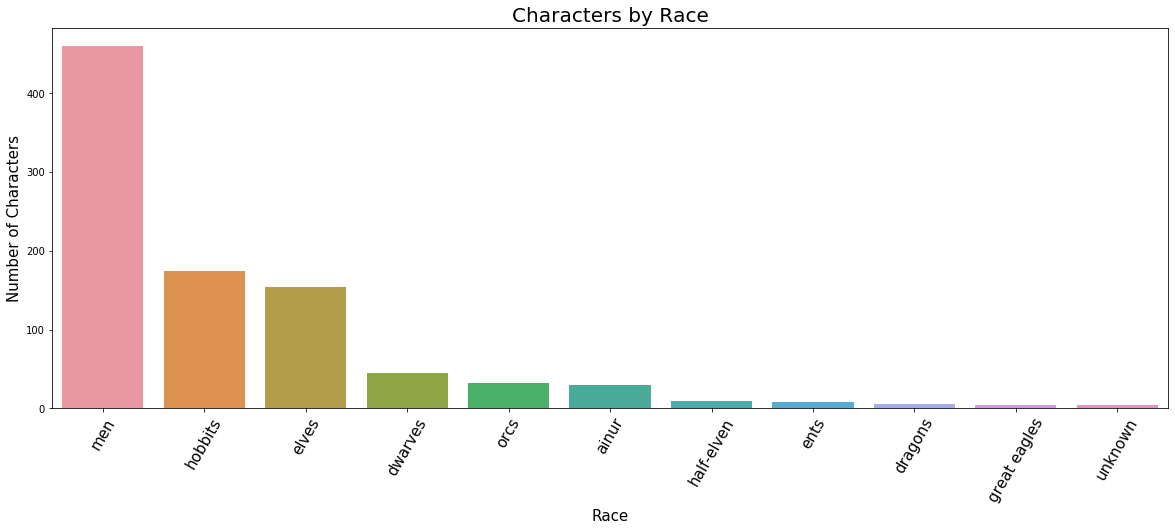

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.countplot(characters_details_df.race,order = characters_details_df.race.value_counts().iloc[:11].index)

plt.xlabel('Race',fontsize=15)
plt.ylabel('Number of Characters',fontsize=15)
plt.title('Characters by Race',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.grid(False)
plt.show()

The graphs above show the distribution of the characters’ races. As the race graph shows, men are most common, then hobbits, elves, dwarfs, orcs and so on.

In [102]:
characters_details_df['normalized_culture'] = characters_details_df['culture'].fillna('unknow')
characters_details_df

actor   age also known as  \
0                                     mikael persbrandt   NaN           NaN   
1                                                   NaN   NaN           NaN   
2                                                   NaN   NaN           NaN   
3                                                   NaN   NaN           NaN   
4                                           elijah wood   NaN           NaN   
5                                                   NaN   NaN           NaN   
6                                                   NaN   NaN           NaN   
7     sir ian holm - old bilbomartin freeman - middl...   NaN           NaN   
8                                                   NaN   NaN           NaN   
9                                                   NaN   NaN           NaN   
10                                                  NaN   NaN           NaN   
11                                                  NaN   NaN           NaN   
12                                                  NaN   NaN           NaN   
13                                                  NaN   NaN           NaN   
14                                                  NaN   NaN           NaN   
15                                      viggo mortensen   210           NaN   
16                                  sir christopher lee   NaN           NaN   
17                                            sean bean    41           NaN   
18    sala baker (lotr trilogy)benedict cumberbatch ...   NaN           NaN   
19                                                  NaN   NaN           NaN   
20                                         hugo weaving   NaN           NaN   
21                                       cate blanchett   NaN           NaN   
22                                                  NaN   NaN           NaN   
23            sadwyn brophy (in the return of the king)   NaN           NaN   
24                                                  NaN   NaN           NaN   
25                                            liv tyler  2901           NaN   
26                                         sarah mcleod   NaN           NaN   
27                                         miranda otto   NaN           NaN   
28                                         bernard hill    71           NaN   
29                                     dominic monaghan   NaN           NaN   
...                                                 ...   ...           ...   
1081                                                NaN   NaN           NaN   
1082                                                NaN   NaN           NaN   
1083                                                NaN   NaN           NaN   
1084                                                NaN   NaN           NaN   
1085                                                NaN   NaN           NaN   
1086                                                NaN   NaN           NaN   
1087                                                NaN   NaN           NaN   
1088                                                NaN   NaN           NaN   
1089                                                NaN   NaN           NaN   
1090                                                NaN   NaN           NaN   
1091                                                NaN   NaN           NaN   
1092                                                NaN   NaN           NaN   
1093                                                NaN   NaN           NaN   
1094                                                NaN   NaN         jagai   
1095                                                NaN   NaN           NaN   
1096                                                NaN   NaN           NaN   
1097                                                NaN   NaN           NaN   
1098                                                NaN   NaN           NaN   
1099                                                NaN   NaN           NaN   
1100                 

In [118]:
from urllib.parse import unquote

#url = unquote(url)
import urllib
from unidecode import unidecode
def normalized_text(row):
    print(unidecode(urllib.parse.unquote(row)))
    return unidecode(urllib.parse.unquote(row))
    #return unidecode(unquote(row))

    
characters_details_df['normalized_culture'] = characters_details_df.astype(str).apply(lambda row: normalized_text(row['culture']), axis=1)
#characters_details_df

beornings
valar (aratar),umaiar
sindar (galadhrim) (elves of lorien)
valar (aratar)
shire-hobbit (brandybuck family/baggins family)
shire-hobbits (took family)
shire-hobbits (took family)
shire-hobbits (baggins family)
istari (wizards)
shire-hobbits (brandybuck family)
dunedain,men of gondor
nan
nan
fire-drakes (dragons of morgoth)
nan
dunedain (house of isildur)
wizards
men of gondor (house of hurin)
nan
nan
nan
noldor (house of finarfin)falmari (house of olwe)
vanyar (house of finwe)
dunedain (house of telcontar)
elves of doriath (house of dior)elves of the havens of sirion
elves of lindon,elves of rivendell
shire-hobbits (cotton family/gamgee family)
rohirrim (house of eorl)
rohirrim (house of eorl)
shire-hobbits, bucklanders
shire-hobbits (gamgee family)
nan
noldor (house of fingolfin) (the silmarillion)noldor (house of finarfin), falmari (house of olwe) (later notes)
sindar (elves of mirkwood)
dunedain of the north
sindar (elves of doriath)
sindar (elves of mirkwood)
durin's folk


In [119]:
characters_details_df['normalized_culture'] = characters_details_df['normalized_culture'].replace(
    {"men of gondor (house of hurin)":"men of gondor",
     "rohirrim (house of eorl)":"rohirrim",
     "númenóreans (house of elros)":"numenoreans",
     "shire-hobbits (bolger family)":"shire-hobbits",
     "shire-hobbits (greenhands) ":"shire-hobbits",
     "shire-hobbits (boffin family) ":"shire-hobbits",
     "shire-hobbits (baggins family)":"shire-hobbits",
     "shire-hobbits (took family)":"shire-hobbits",
     "shire-hobbits (boffin family)": "shire-hobbits",
     "men of gondor (house of anarion)":"men of gondor",
     "numenoreans (house of elros)": "house of elros",
     "dunedain of the north (house of isildur)":"house of isildur",
     "silvan elves of lothlorien (galadhrim)": "galadhrim"})

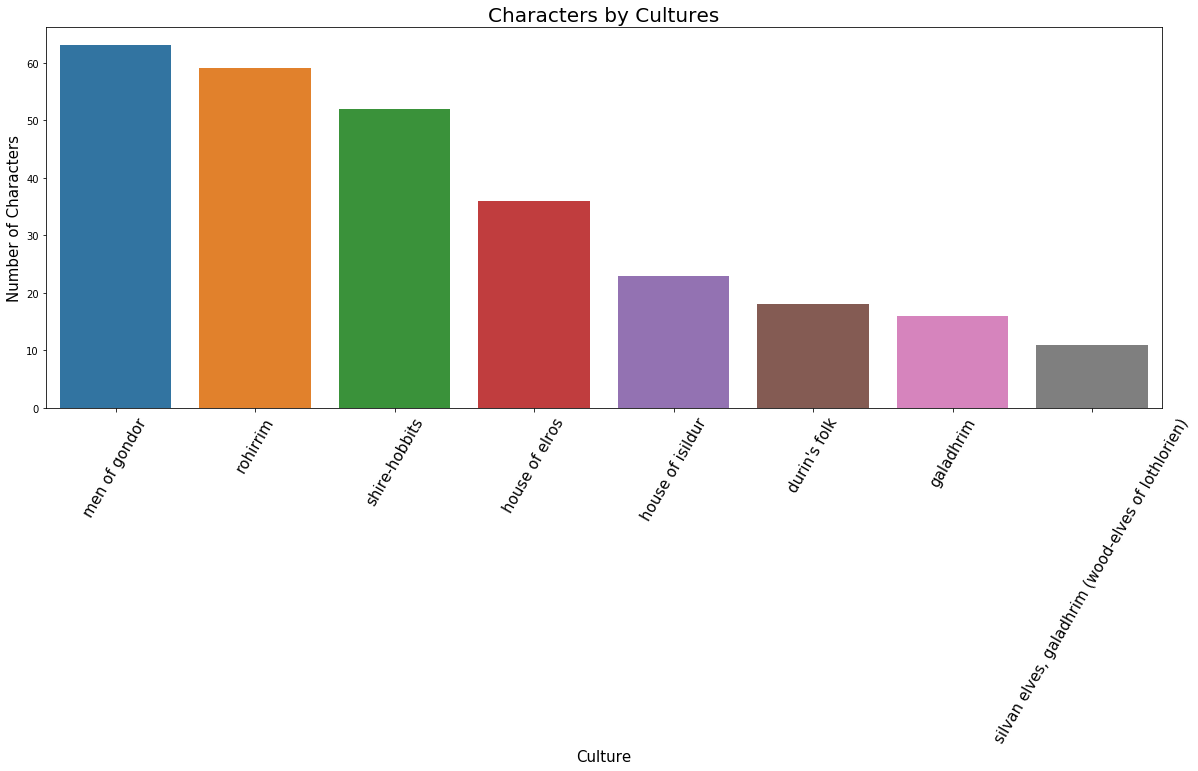

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.countplot(characters_details_df.normalized_culture,order = characters_details_df.normalized_culture.value_counts().iloc[1:9].index)

plt.xlabel('Culture',fontsize=15)
plt.ylabel('Number of Characters',fontsize=15)
plt.title('Characters by Cultures',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.grid(False)
plt.show()

Here, unsurprisingly, the most common cultures are the men’s cultures with Gondor and The Rohan at the top. This graph is correlated with the races graph and it tells the same story.

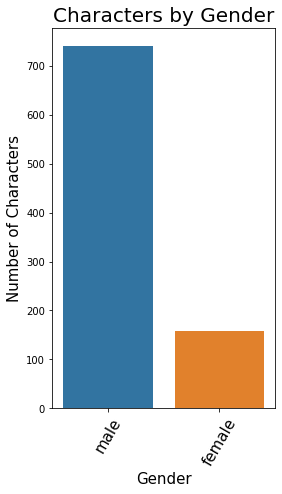

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,7))
sns.countplot(characters_details_df.gender,order = characters_details_df.gender.value_counts().iloc[:2].index,)

plt.xlabel('Gender',fontsize=15)
plt.ylabel('Number of Characters',fontsize=15)
plt.title('Characters by Gender',fontsize=20)
plt.xticks(rotation=60,fontsize=15)

plt.show()

In [122]:
characters_details_df['weapon'] = characters_details_df['weapon'].fillna('unknown')
characters_details_df['weapon']

0                                                 unknown
1       powers of the valar, grond, mace, sword, hamme...
2                                                 unknown
3                                     powers of the valar
4                                  sting and barrow-blade
5                                                 unknown
6                                                 unknown
7                                                   sting
8                                            wizard staff
9                                                 unknown
10                             presumably a bow and sword
11                                                unknown
12                                                unknown
13                                                unknown
14                                                unknown
15                                    andúril, bow, sword
16                       wizard staff,dagger,dark sorcery
17            

In [123]:
characters_details_df['normalized_weapon'] = characters_details_df.astype(str).apply(lambda row: normalized_text(row['weapon']), axis=1)
characters_details_df['normalized_weapon']

unknown
powers of the valar, grond, mace, sword, hammer, black spear
unknown
powers of the valar
sting and barrow-blade
unknown
unknown
sting
wizard staff
unknown
presumably a bow and sword
unknown
unknown
unknown
unknown
anduril, bow, sword
wizard staff,dagger,dark sorcery
sword,shield,dagger (movies)
one ring, mace, sword, sorcery, powers of the maiar
unknown
hadhafang (films)
elf magic, ring nenya
unknown
anduril
unknown
unknown
unknown
sword
herugrim
barrow-blade, noldorin dagger (film)
barrow blade, also wielded sting in cirith ungol
sword
aeglos
bow and "long white knife"
unknown
unknown
sword
broad-bladed axe
shards of narsil, chieftain's sword
powers of the ainur
scimitar,knife
wizard staffpowers of the maiar
narsil
barrow-bladeelven dagger (film)
unknown
guthwine
unknown
sword,[3] nail-knife,[4] bow (films)
sword
unknown
unknown
unknown
unknown
powers of the valar
powers of the valar
angrist,dagmor,bow[4]
longbow, black arrow, sword
bare hands, feet, and legs
unknown
shards of

0                                                 unknown
1       powers of the valar, grond, mace, sword, hamme...
2                                                 unknown
3                                     powers of the valar
4                                  sting and barrow-blade
5                                                 unknown
6                                                 unknown
7                                                   sting
8                                            wizard staff
9                                                 unknown
10                             presumably a bow and sword
11                                                unknown
12                                                unknown
13                                                unknown
14                                                unknown
15                                    anduril, bow, sword
16                       wizard staff,dagger,dark sorcery
17            

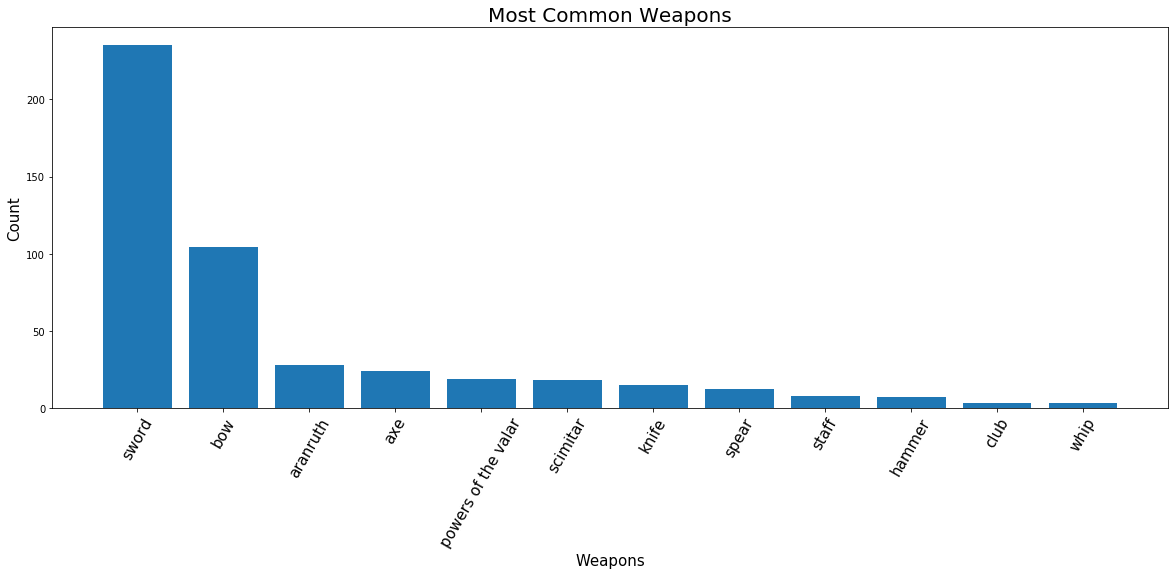

In [124]:
from collections import OrderedDict
weapon_dict={'sword':0,'bow':0,"powers of the valar":0,"axe":0,
             "staff":0,"spear":0,"hammer":0,"club":0,"knife":0,
             "whip":0, "aranruth":0,"scimitar":0}
for weapon in list(characters_details_df.normalized_weapon.dropna()):
    for k,v in weapon_dict.items():
        if k in weapon:
            weapon_dict[k]+=1
            
weapon_dict = OrderedDict(sorted(weapon_dict.items(), key=lambda x: x[1],reverse=True))
plt.figure(figsize=(20,7))
plt.bar(range(len(weapon_dict)), list(weapon_dict.values()), align='center')
plt.xlabel('Weapons',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Most Common Weapons',fontsize=20)
plt.xticks(range(len(weapon_dict)), list(weapon_dict.keys()),rotation=60,fontsize=15)

plt.show()

In [125]:
characters_details_df['normalized_realm'] = characters_details_df.apply(lambda row: row['realms'] if pd.isnull(row['realm']) else row['realms'],axis=1)
characters_details_df['normalized_realm'] = characters_details_df.apply(lambda row: normalized_text(row['normalized_realm']) if not pd.isnull(row['normalized_realm']) else row['normalized_realm'],axis=1)
characters_details_df['normalized_realm']

utumno (formerly), angband, much of middle-earth and beleriand for a time
lothlorien
reunited kingdom (arnor and gondor)
gondor
lindon, rivendell
tirion, doriath, lindon, eregion, lothlorien
tirion
reunited kingdom
rivendell,reunited kingdom
rohan
havens of sirionlindon
woodland realmithilien
doriathlindoneregionlothlorien
woodland realm
thorin's halls,lonely mountain,glittering caves
romenna, numenor;arnor;gondor
rohan
gondor, ithilien and emyn arnen (after the war of the ring)
lonely mountain
old forest
pastures of yavanna
arda
dale
valinor, in taniquetil
falas, balar, lindon
torech ungol
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
angmar, minas morgul
tirionformenos
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
gondor
arthedain
gondor
gondor
arthedain
tirion
brethil
isengard
dale,lake-town
iron hillslonely mountain
iron hills,lonely mountain
grey mountains
khazad-dum
grey mounta

0                                                     NaN
1       utumno (formerly), angband, much of middle-ear...
2                                              lothlorien
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                    reunited kingdom (arnor and gondor)
16                                                    NaN
17            

In [126]:
realms_dict={'gondor':0,'numenor':0,"rohan":0,"arthedain":0,"arnor":0,"grey mountains":0,
             "buckland":0,"lake-town":0,"reunited kingdom":0,"tirion":0, "bree":0,"rhovanion":0,
             "dale":0,"estolad":0,"woodland":0,"lonely mountain":0,"iron hills":0,"isengard":0,
             "blue mountains":0,"white mountains":0,"khazad-dum":0,"rivendell":0,"lothlorien":0,
             "glittering caves":0,"falas":0, "balar":0, "lindon":0}

In [127]:
for realm in list(characters_details_df.normalized_realm.dropna()):
    for k,v in realms_dict.items():
        if k in realm:
            realms_dict[k]+=1

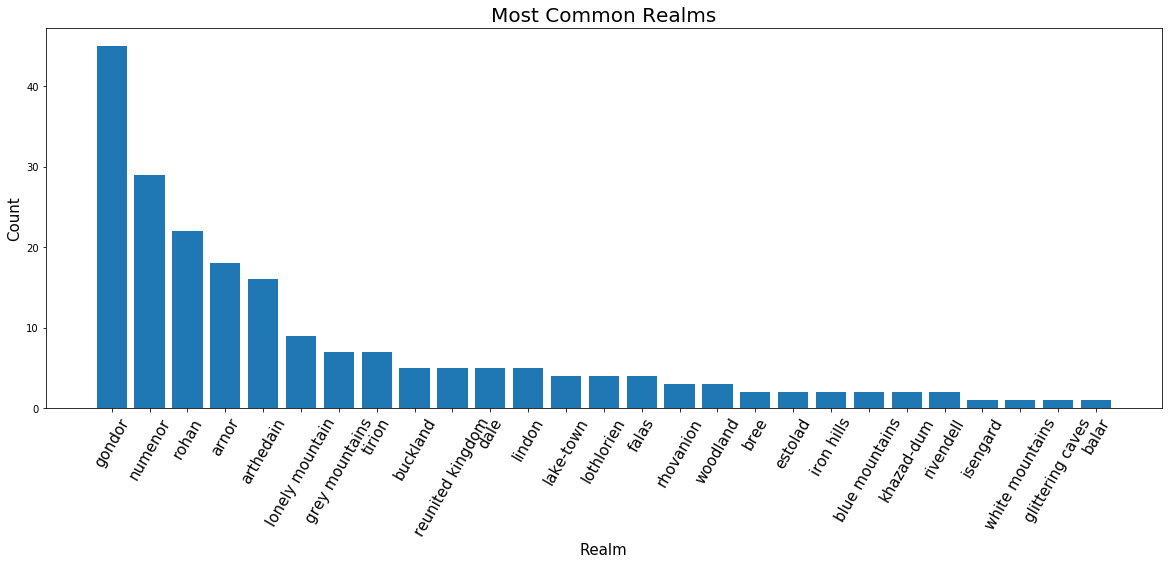

In [128]:
realms_dict = OrderedDict(sorted(realms_dict.items(), key=lambda x: x[1],reverse=True))
plt.figure(figsize=(20,7))
plt.bar(range(len(realms_dict)), list(realms_dict.values()), align='center')
plt.xlabel('Realm',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Most Common Realms',fontsize=20)
plt.xticks(range(len(realms_dict)), list(realms_dict.keys()),rotation=60,fontsize=15)
plt.grid(False)
plt.show()

Generating Word Cloud:

In [77]:
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [85]:
stop_words = set(stopwords.words('english')) 

In [86]:
stopwords.words('english')
stop_words.add('the')
stop_words.add('now')
stop_words.add('many')
stop_words.add('still')
stop_words.add('came')
stop_words.add('will')
stop_words.add('said')
stop_words.add('would')
stop_words.add('could')
stop_words.add('come')

In [91]:
file1 = open("bookx.txt") 
line = file1.read()
words = line.split() 
dataset = []
for r in words:
    if not r.lower() in stop_words: 
        #dataset.append(r)
        appendFile = open('filteredtext.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [92]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
char_mask = np.array(Image.open("lotr1.jpg"))  
image_colors = ImageColorGenerator(char_mask)

In [93]:
dataset = open("filteredtext.txt", "r").read()

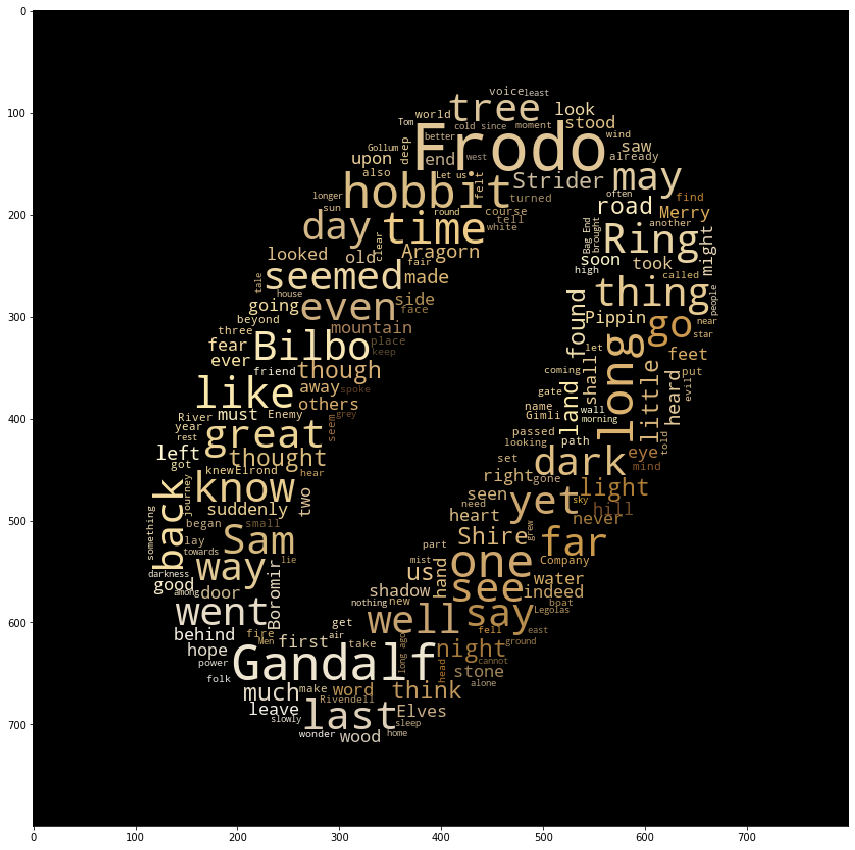

In [94]:
plt.figure(figsize=(25,15))
wc = WordCloud(background_color="black",stopwords = stop_words, max_words=200, width=800, height=800, mask=char_mask, random_state=1)
#cloud.generate(string)
wc.generate(dataset)
wc.to_file("wordCloud.png")
plt.imshow(wc.recolor(color_func=image_colors))
plt.grid(False)
plt.show()

# Finding the important character based on co-appearances:

In [120]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [121]:
lotr = pd.read_csv('coapperances.csv')

In [122]:
lotr.head()

Source Target  Weight
0   frod   sams     533
1   frod  ganda     181
2   merr   pipp     162
3   arag   frod     146
4   frod   goll     127

Lets convert it into a graph for leveraging networkx library

In [99]:
G_lotr = nx.Graph()
for row in lotr.iterrows():
    G_lotr.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['Weight'])

In [100]:
print("Nodes :",G_lotr.number_of_nodes())
print("Edges :",G_lotr.number_of_edges())

Nodes : 73
Edges : 1444


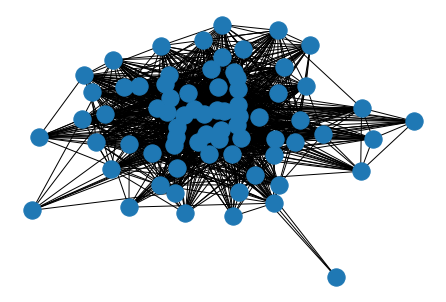

In [101]:
import matplotlib as pl
nx.draw(G_lotr,pos=nx.spring_layout(G_lotr))

Let's get the adjacency matrix for that graph, in sparse matrix representation.

In [103]:
characters = np.array(list(G_lotr.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(G_lotr, dtype=np.float64)
Adj

<73x73 sparse matrix of type '<class 'numpy.float64'>'
	with 2888 stored elements in Compressed Sparse Row format>

In [104]:
print(characters)

['frod' 'sams' 'ganda' 'merr' 'pipp' 'arag' 'goll' 'bilb' 'ring' 'gimli'
 'lego' 'shir' 'saru' 'boro' 'isen' 'elro' 'saur' 'theod' 'fara' 'mord'
 'gond' 'roha' 'eome' 'elve' 'rive' 'ents' 'treeb' 'sfax' 'orcs' 'bage'
 'andu' 'comp' 'dene' 'hobb' 'bree' 'tiri' 'mori' 'orth' 'arat' 'elen'
 'bere' 'arwe' 'dwar' 'isil' 'nazg' 'eowy' 'tomb' 'gloi' 'bill' 'cele'
 'gala' 'lori' 'osgi' 'hton' 'grim' 'morg' 'edor' 'gber' 'shel' 'duri'
 'dtow' 'nume' 'eorl' 'gild' 'glorf' 'bali' 'helm' 'thor' 'thra' 'loth'
 'hald' 'gorb' 'mdoo']


In [105]:
pd.DataFrame(G_lotr).T

0     1      2     3     4     5     6     7     8      9   ...    63  \
0  frod  sams  ganda  merr  pipp  arag  goll  bilb  ring  gimli  ...  gild   

      64    65    66    67    68    69    70    71    72  
0  glorf  bali  helm  thor  thra  loth  hald  gorb  mdoo  

[1 rows x 73 columns]

In [106]:
n = len(characters)
n

73

In [107]:
from scipy import sparse
import scipy.sparse.linalg
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()
Deginv.todense()

matrix([[0.00040519, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00063532, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00054795, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.01612903, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.04545455,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.02173913]])

In [108]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

<Figure size 432x288 with 0 Axes>

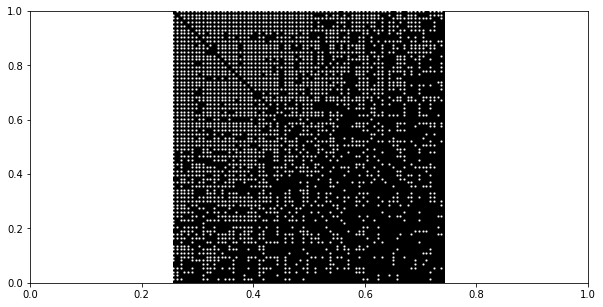

In [109]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

In [110]:
pd.DataFrame(Adj.todense())

0      1      2      3      4      5      6      7      8      9   ...  \
0     0.0  533.0  181.0   86.0  115.0  146.0  127.0  126.0  110.0   34.0  ...   
1   533.0    0.0   51.0   63.0  101.0   75.0  118.0   36.0   46.0   19.0  ...   
2   181.0   51.0    0.0   41.0  124.0  123.0   20.0   54.0   67.0   54.0  ...   
3    86.0   63.0   41.0    0.0  162.0   65.0    1.0   13.0   12.0   26.0  ...   
4   115.0  101.0  124.0  162.0    0.0   64.0    3.0   12.0   13.0   20.0  ...   
5   146.0   75.0  123.0   65.0   64.0    0.0   17.0   16.0   30.0   73.0  ...   
6   127.0  118.0   20.0    1.0    3.0   17.0    0.0   26.0   21.0    0.0  ...   
7   126.0   36.0   54.0   13.0   12.0   16.0   26.0    0.0   30.0    1.0  ...   
8   110.0   46.0   67.0   12.0   13.0   30.0   21.0   30.0    0.0    4.0  ...   
9    34.0   19.0   54.0   26.0   20.0   73.0    0.0    1.0    4.0    0.0  ...   
10   28.0   19.0   45.0   27.0   22.0   84.0    3.0    2.0    7.0  109.0  ...   
11  104.0   50.0   49.0   34.0   41.0   27.0    7.0   49.0   29.0    0.0  ...   
12   15.0    3.0   72.0   17.0   15.0   24.0    4.0    4.0   22.0   12.0  ...   
13   68.0   26.0   33.0   19.0   30.0   63.0    2.0    2.0   30.0   14.0  ...   
14    7.0    2.0   45.0   17.0   17.0   13.0    0.0    0.0   10.0    6.0  ...   
15   39.0   14.0   44.0    7.0    8.0   59.0    4.0   19.0   27.0    7.0  ...   
16   26.0   17.0   39.0    3.0    6.0   32.0   14.0    4.0   59.0    9.0  ...   
17    8.0    2.0   57.0   19.0    2.0   32.0    2.0    0.0    3.0    5.0  ...   
18   55.0   27.0   36.0    5.0   26.0   31.0   19.0    1.0    8.0    0.0  ...   
19   48.0   34.0   37.0    3.0   11.0   34.0   22.0    1.0   26.0    7.0  ...   
20   25.0   15.0   45.0   15.0   30.0   52.0    4.0    2.0   17.0    5.0  ...   
21   11.0    3.0   37.0   19.0   24.0   49.0    3.0    0.0    6.0   14.0  ...   
22    2.0    1.0   24.0   15.0    6.0   50.0    0.0    0.0    3.0   13.0  ...   
23   45.0   43.0   22.0    2.0    5.0   18.0    5.0   12.0    5.0   20.0  ...   
24   45.0   15.0   24.0   10.0    5.0   28.0    0.0   14.0   14.0    4.0  ...   
25    3.0    2.0   11.0   12.0   15.0    7.0    1.0    0.0    0.0    3.0  ...   
26    1.0    1.0   34.0   28.0   25.0   18.0    1.0    0.0    4.0   21.0  ...   
27    5.0    1.0   42.0    1.0   14.0    9.0    0.0    0.0    1.0    4.0  ...   
28   34.0   23.0   17.0   22.0   30.0   41.0   18.0    3.0    9.0   12.0  ...   
29   41.0   21.0   11.0    6.0    9.0    1.0    0.0   22.0    4.0    0.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
43    7.0    3.0    8.0    0.0    1.0   19.0    5.0    2.0   15.0    2.0  ...   
44   25.0    9.0   13.0    3.0    8.0    4.0    3.0    2.0    4.0    0.0  ...   
45    0.0    0.0    6.0   22.0    0.0   16.0    0.0    0.0    1.0    1.0  ...   
46   24.0   10.0    3.0    6.0    2.0    1.0    0.0    1.0    9.0    0.0  ...   
47    9.0    0.0    6.0    0.0    0.0    7.0    1.0    4.0    5.0   24.0  ...   
48    9.0   21.0    3.0    3.0    1.0    5.0    0.0    0.0    0.0    1.0  ...   
49    1.0    1.0    3.0    1.0    1.0    6.0    0.0    0.0    0.0    2.0  ...   
50   18.0   14.0   11.0    2.0    2.0   12.0    0.0    3.0    7.0    7.0  ...   
51   21.0   16.0    3.0    1.0    2.0   18.0    5.0    1.0    3.0    1.0  ...   
52    5.0    1.0    2.0    1.0    0.0    2.0    4.0    0.0    0.0    0.0  ...   
53   19.0   16.0    8.0    5.0    4.0    0.0    0.0   13.0    4.0    0.0  ...   
54    3.0    1.0   16.0    2.0    2.0    1.0    0.0    0.0    0.0    1.0  ...   
55   17.0   10.0    7.0    0.0    0.0    6.0    7.0    0.0    3.0    0.0  ...   
56    2.0    0.0   16.0    4.0    1.0   10.0    0.0    0.0    0.0    3.0  ...   
57    5.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  ...   
58    8.0   15.0    0.0    1.0    1.0    4.0    6.0    0.0    4.0    0.0  ...   
59    0.0    0.0    9.0    1.0    1.0    1.0    0.0    0.0    3.0   14.0  ...   
60    9.0    5.0    5.0    0.0    2.0 

In [111]:
Trans = (Deginv @ Adj).T
Trans.todense()

matrix([[0.        , 0.3386277 , 0.09917808, ..., 0.14516129, 0.18181818,
         0.17391304],
        [0.21596434, 0.        , 0.02794521, ..., 0.03225806, 0.40909091,
         0.17391304],
        [0.07333874, 0.03240152, 0.        , ..., 0.        , 0.        ,
         0.04347826],
        ...,
        [0.00364668, 0.00127065, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00162075, 0.00571792, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00324149, 0.00508259, 0.00109589, ..., 0.        , 0.        ,
         0.        ]])

In [112]:
from scipy.sparse.linalg import spsolve

damping = 0.85  # damping factor
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

pagerank

array([0.07724491, 0.04945696, 0.05859221, 0.0271616 , 0.03461756,
       0.05400686, 0.0163602 , 0.01742358, 0.02644702, 0.02187051,
       0.02036376, 0.02480343, 0.02028198, 0.01976916, 0.01506659,
       0.0178662 , 0.02334829, 0.01490636, 0.0162789 , 0.01961838,
       0.02760495, 0.02150172, 0.01283801, 0.01865949, 0.01328799,
       0.00772587, 0.01200978, 0.00664512, 0.01804635, 0.00645619,
       0.00969394, 0.01304694, 0.01105469, 0.00732345, 0.00833809,
       0.01320824, 0.01094128, 0.00858977, 0.00501982, 0.0089109 ,
       0.00576527, 0.0060246 , 0.0095785 , 0.0092785 , 0.00573767,
       0.0067628 , 0.00664317, 0.00610057, 0.00371314, 0.00542836,
       0.00913482, 0.00936047, 0.00571208, 0.00537791, 0.00511072,
       0.00683472, 0.00621437, 0.00307686, 0.00424186, 0.00543014,
       0.00512781, 0.00553569, 0.00542695, 0.00347893, 0.00441655,
       0.00417242, 0.00509714, 0.00511458, 0.00425514, 0.00527531,
       0.00403206, 0.00272252, 0.0034313 ])

In [113]:
degrees = np.ravel(Adj.sum(axis=0))

In [114]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(characters, degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 frod (2468.0) 0.07724491211797964
1 sams (1574.0) 0.049456959141226116
2 ganda (1825.0) 0.05859220703151094
3 merr (852.0) 0.027161597029295388
4 pipp (1107.0) 0.03461755800439635
5 arag (1685.0) 0.05400686330876358
6 goll (496.0) 0.016360202195114474
7 bilb (515.0) 0.017423581187542014
8 ring (786.0) 0.02644701938159218
9 gimli (635.0) 0.02187051032646929
10 lego (599.0) 0.02036375687743469
11 shir (734.0) 0.02480342721985587
12 saru (587.0) 0.020281982806828185
13 boro (597.0) 0.01976916126982446
14 isen (420.0) 0.015066590860940712
15 elro (502.0) 0.01786619860158677
16 saur (667.0) 0.023348294060329684
17 theod (405.0) 0.01490636183316822
18 fara (469.0) 0.016278900069547325
19 mord (570.0) 0.019618383072601695
20 gond (806.0) 0.027604951467061177
21 roha (622.0) 0.021501721285526864
22 eome (346.0) 0.012838014273685437
23 elve (512.0) 0.018659489957933522
24 rive (358.0) 0.013287990008923061
25 ents (186.0) 0.007725867883742176
26 treeb (328.0) 0.012009779019407344
27 sfax (151.

In [115]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of interactions)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


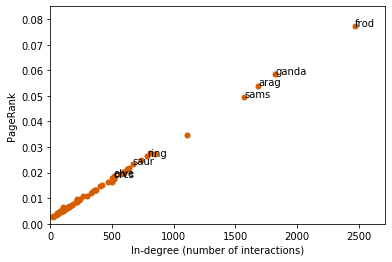

In [116]:
interesting = ['frod','ganda','sams','arag','elve','orcs','ring','saur']


pagerank_plot(degrees, pagerank, characters, annotations=interesting)

In [117]:
pip install python-louvain

  Stored in directory: /Users/priyamsuthar/Library/Caches/pip/wheels/f9/74/a9/14f051b00dddd46d71529db15507796da13a43ee2c0bc39def
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


Community-wise plot:

{'frod': 0, 'sams': 0, 'ganda': 1, 'merr': 1, 'pipp': 1, 'arag': 2, 'goll': 0, 'bilb': 0, 'ring': 0, 'gimli': 2, 'lego': 2, 'shir': 0, 'saru': 1, 'boro': 3, 'isen': 1, 'elro': 2, 'saur': 3, 'theod': 3, 'fara': 3, 'mord': 3, 'gond': 3, 'roha': 3, 'eome': 3, 'elve': 2, 'rive': 2, 'ents': 1, 'treeb': 1, 'sfax': 1, 'orcs': 2, 'bage': 0, 'andu': 3, 'comp': 2, 'dene': 3, 'hobb': 0, 'bree': 0, 'tiri': 3, 'mori': 2, 'orth': 1, 'arat': 2, 'elen': 3, 'bere': 3, 'arwe': 2, 'dwar': 2, 'isil': 3, 'nazg': 0, 'eowy': 3, 'tomb': 0, 'gloi': 2, 'bill': 0, 'cele': 2, 'gala': 2, 'lori': 2, 'osgi': 3, 'hton': 0, 'grim': 1, 'morg': 3, 'edor': 3, 'gber': 0, 'shel': 0, 'duri': 2, 'dtow': 3, 'nume': 3, 'eorl': 3, 'gild': 0, 'glorf': 2, 'bali': 2, 'helm': 3, 'thor': 2, 'thra': 2, 'loth': 2, 'hald': 2, 'gorb': 0, 'mdoo': 3}


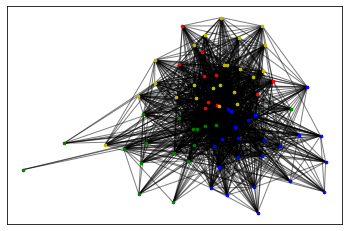

In [118]:
from networkx.algorithms.community.quality import modularity
import matplotlib.pyplot as plt
import numpy as np
from community import community_louvain



partition=community_louvain.best_partition(G_lotr)

print(partition)
#c=list(greedy_modularity_communities(G,weight=G.get_edge_data))
#sorted(c[0])


cmap=['g','r','b','y','c','o']
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_lotr)
count = 0
for com in set(partition.values()) :
    #print(com)
    count += 1
    list_nodes = [nodes for nodes in partition.keys()
                                      if partition[nodes] == com]
    nx.draw_networkx_nodes(G_lotr, pos, list_nodes, node_size = 7, node_color = cmap[com],edge_color=cmap[com])

nx.draw_networkx_edges(G_lotr, pos,alpha=0.5)
plt.show()

In [119]:
part=[]

for key, value in partition.items():
    temp = [key,value]
    part.append(temp)

part_mat_vals = np.vstack(part)
#mat_vals[0]=int(mat_vals[0])
#mat_vals.sort()

#print(close_tere)
#print("___________________________")
#print(sorted(mat_vals[0][0],key=lambda x: (x[1]), reverse=True))
part_ter=sorted(part_mat_vals,key=lambda x: (x[1]), reverse=True)



# INPUT THE CLASS INDEX FOR WHICH YOU WANT THE CHARACTERS. IN OUR CASE, ITS CLASS/PARTITION NO: 1.

for i in range(0, len(part_ter)):
    if int(part_ter[i][1])==0:
        print(part_ter[i][0])

frod
sams
goll
bilb
ring
shir
bage
hobb
bree
nazg
tomb
bill
hton
gber
shel
gild
gorb
